Machine Learning Tasks Requirements:
 
1) Describe the rationale and justification for the choice of machine learning models for the above-mentioned scenario. Machine Learning models can be used for Prediction, Classification, Clustering, sentiment analysis, recommendation systems and Time series analysis. You should plan on trying multiple approaches (at least two) with proper selection of hyperparameters using GridSearchCV method. You can choose appropriate features from the datasets and a target feature to answer the question asked in the scenario in the case of supervised learning.

2) Collect and develop a dataset based on the construction topic related to Ireland as well as other parts of the world. Perform a sentimental analysis for an appropriate Public Sector Employment and Earnings topic (e.g., change of Health Employment Numbers, availability of Educators etc…) for the Governmental and/or citizens point of view in Ireland.

3) You should train and test for Supervised Learning and other appropriate metrics for unsupervised/ semi-supervised machine learning models that you have chosen. Use cross validation to provide authenticity of the modelling outcomes. You can apply dimensionality reduction methods to prepare the dataset based on your machine learning modelling requirements.

4) A Table or graphics should be provided to illustrate the similarities and contrast of the Machine Learning modelling outcomes based on the scoring metric used for the analysis of the above-mentioned scenario. Discuss and elaborate your understanding clearly.



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm

In [5]:
import matplotlib.pyplot as plt

In [15]:
# We will use the structured datasets we have transformed in before section
# 1st dataset
employment = pd.read_csv('structured_data/employment.csv')
avgHrEarns  = pd.read_csv('structured_data/avgHrEarns_1_pd.csv')
avgHrEarnsExIE = pd.read_csv('structured_data/avgHrEarnsExIE_1_pd.csv')
avgHrIE = pd.read_csv('structured_data/avgHrIE_1_pd.csv')
avgHrOthLC = pd.read_csv('structured_data/avgHrOthLC_1_pd.csv')
avgHrTotLC = pd.read_csv('structured_data/avgHrTotLC_1_pd.csv')
avgWkEarns = pd.read_csv('structured_data/avgWkEarns_1_pd.csv')
avgWkPH = pd.read_csv('structured_data/avgWkPH_1_pd.csv')
# 2nd dataset
gender_public = pd.read_csv('structured_data/gender_public_pd.csv')
employ_public = pd.read_csv('structured_data/employ_public_pd.csv')

In [23]:
import pandas as pd
import os

directory_path = 'C:\\Users\\dovle\\Downloads\\CCT_23_2'

# Belirtilen klasördeki tüm dosyaları listele
files_in_directory = os.listdir(directory_path)

# Sadece .csv uzantılı dosyaları filtrele
csv_files = [f for f in files_in_directory if f.endswith('.csv')]

# Dosyaları bir sözlük içinde saklayalım
dataframes = {}

for csv_file in csv_files:
    # Dosya adını (uzantısız) anahtar olarak kullan
    key_name = os.path.splitext(csv_file)[0]
    dataframes[key_name] = pd.read_csv(os.path.join(directory_path, csv_file))

# Her veri setinin ilk beş satırını yazdıralım
for key, df in dataframes.items():
    print(f"Data for {key}:\n", df.head(), "\n\n")


Data for avgHrEarnsExIE_1_pd:
   Quarter           sector  avgHrEarnsExIE
0  2008Q1    Civil service           27.78
1  2008Q1          Defence           22.85
2  2008Q1   Garda Siochana           23.43
3  2008Q1        Education           35.19
4  2008Q1  Regional bodies           24.13 


Data for avgHrEarns_1_pd:
   Quarter           sector  avgHrEarns
0  2008Q1    Civil service       28.69
1  2008Q1          Defence       23.87
2  2008Q1   Garda Siochana       26.97
3  2008Q1        Education       35.49
4  2008Q1  Regional bodies       27.84 


Data for avgHrIE_1_pd:
   Quarter           sector  avgHrIE
0  2008Q1    Civil service     0.91
1  2008Q1          Defence     1.02
2  2008Q1   Garda Siochana     3.54
3  2008Q1        Education     0.31
4  2008Q1  Regional bodies     3.71 


Data for avgHrOthLC_1_pd:
   Quarter           sector  avgHrOthLC
0  2008Q1    Civil service        1.82
1  2008Q1          Defence        2.26
2  2008Q1   Garda Siochana        2.19
3  2008Q1        E

In [52]:
for key, df in dataframes.items():
    print(f"Missing values in {key}:\n", df.isnull().sum(), "\n\n")


Missing values in avgHrEarnsExIE_1_pd:
 Quarter           0
sector            0
avgHrEarnsExIE    0
dtype: int64 


Missing values in avgHrEarns_1_pd:
 Quarter       0
sector        0
avgHrEarns    0
dtype: int64 


Missing values in avgHrIE_1_pd:
 Quarter    0
sector     0
avgHrIE    0
dtype: int64 


Missing values in avgHrOthLC_1_pd:
 Quarter       0
sector        0
avgHrOthLC    0
dtype: int64 


Missing values in avgHrTotLC_1_pd:
 Quarter       0
sector        0
avgHrTotLC    0
dtype: int64 


Missing values in avgWkEarns_1_pd:
 Quarter       0
sector        0
avgWkEarns    0
dtype: int64 


Missing values in avgWkPH_1_pd:
 Quarter    0
sector     0
avgWkPH    0
dtype: int64 


Missing values in employment:
 Quarter     0
sector      0
Employed    0
dtype: int64 


Missing values in employ_public_pd:
 Country               0
Indicator             0
Year                  0
Population (2020)    64
Yearly Change        64
Net Change           64
Density (P/Km²)      64
Land Area (Km²

In [60]:
missing_values = merged_data.isnull().sum()
print(missing_values)


Quarter           0
sector            0
avgHrEarnsExIE    0
avgHrEarns        0
avgHrIE           0
avgHrOthLC        0
avgHrTotLC        0
avgWkEarns        0
avgWkPH           0
Employed          0
dtype: int64


In [56]:
# Assuming I have already loaded all your dataframes into the dataframes dict
# Start with your main dataframe
merged_data = dataframes['avgHrEarnsExIE_1_pd']

for key, df in dataframes.items():
    if key != 'avgHrEarnsExIE_1_pd':
        # Check if 'Quarter' and 'sector' columns are in the current dataframe
        if 'Quarter' in df.columns and 'sector' in df.columns:
            merged_data = pd.merge(merged_data, df, on=['Quarter', 'sector'], how='left')
        else:
            print(f"{key} lacks 'Quarter' or 'sector' columns and will not be merged.")

print(merged_data.head())


employ_public_pd lacks 'Quarter' or 'sector' columns and will not be merged.
gender_public_pd lacks 'Quarter' or 'sector' columns and will not be merged.
  Quarter           sector  avgHrEarnsExIE  avgHrEarns  avgHrIE  avgHrOthLC  \
0  2008Q1    Civil service           27.78       28.69     0.91        1.82   
1  2008Q1          Defence           22.85       23.87     1.02        2.26   
2  2008Q1   Garda Siochana           23.43       26.97     3.54        2.19   
3  2008Q1        Education           35.19       35.49     0.31        2.85   
4  2008Q1  Regional bodies           24.13       27.84     3.71        2.64   

   avgHrTotLC  avgWkEarns  avgWkPH  Employed  
0       30.50      918.03     32.0   41700.0  
1       26.13      843.53     35.3   11200.0  
2       29.17     1182.62     43.8   14900.0  
3       38.35      892.52     25.1  116100.0  
4       30.48      963.45     34.6   38900.0  


In [54]:
print(merged_data.describe())


       avgHrEarnsExIE  avgHrEarns     avgHrIE  avgHrOthLC  avgHrTotLC  \
count      671.000000  671.000000  671.000000  671.000000  671.000000   
mean        27.340358   28.779106    1.438763    3.264292   32.043353   
std          4.371466    4.300627    1.223555    1.296480    4.850357   
min         21.730000   22.580000    0.090000    1.370000   24.730000   
25%         24.675000   26.260000    0.640000    2.295000   28.660000   
50%         26.400000   28.220000    1.170000    2.950000   31.710000   
75%         28.305000   29.775000    1.630000    3.765000   33.665000   
max         45.140000   48.940000    8.340000    7.650000   54.450000   

        avgWkEarns     avgWkPH       Employed  
count   671.000000  671.000000     671.000000  
mean    978.684963   34.395082  109408.792846  
std     120.710606    4.259180  131198.561708  
min     789.800000   23.300000    8800.000000  
25%     902.430000   32.350000   14900.000000  
50%     959.750000   35.100000   43600.000000  
75%   

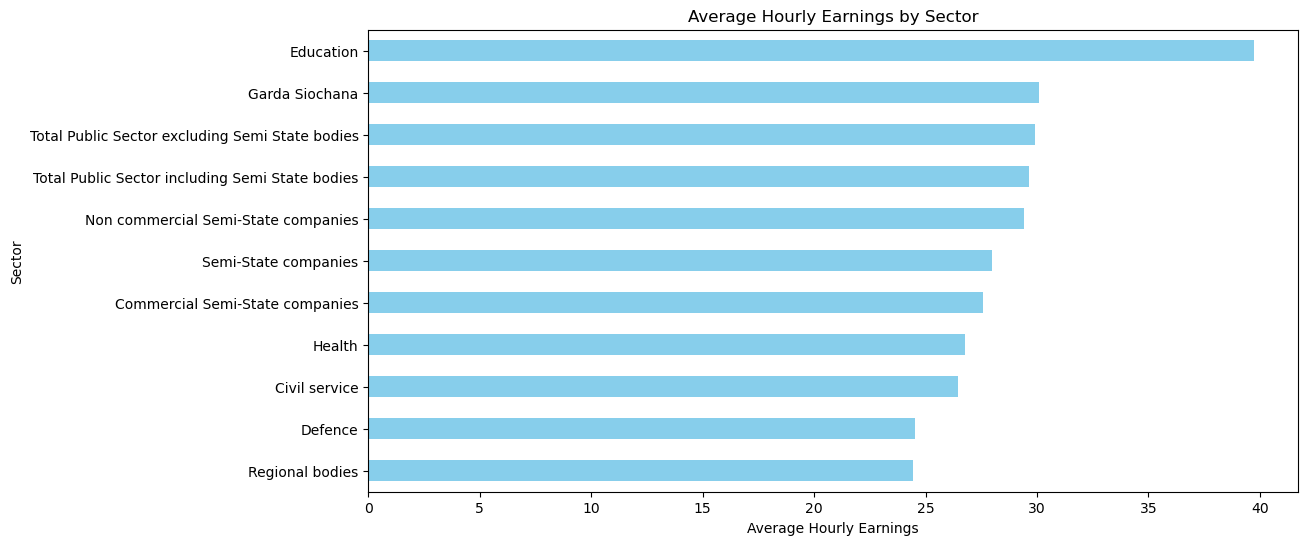

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
merged_data.groupby('sector')['avgHrEarns'].mean().sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Average Hourly Earnings')
plt.ylabel('Sector')
plt.title('Average Hourly Earnings by Sector')
plt.show()


### Trend Analyz

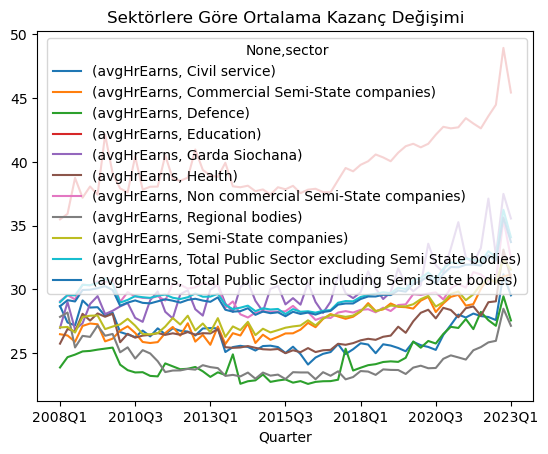

In [25]:
import matplotlib.pyplot as plt
avg_earnings_per_quarter = dataframes['avgHrEarns_1_pd'].groupby(['Quarter', 'sector']).mean()
avg_earnings_per_quarter.unstack().plot()
plt.title('Sektörlere Göre Ortalama Kazanç Değişimi')
plt.show()


C:\Users\dovle\AppData\Local\Temp\ipykernel_11620\1039190898.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframes['avgHrEarns_1_pd'].groupby('sector').median().sort_values(by='avgHrEarns', ascending=False)['avgHrEarns'].plot(kind='bar')


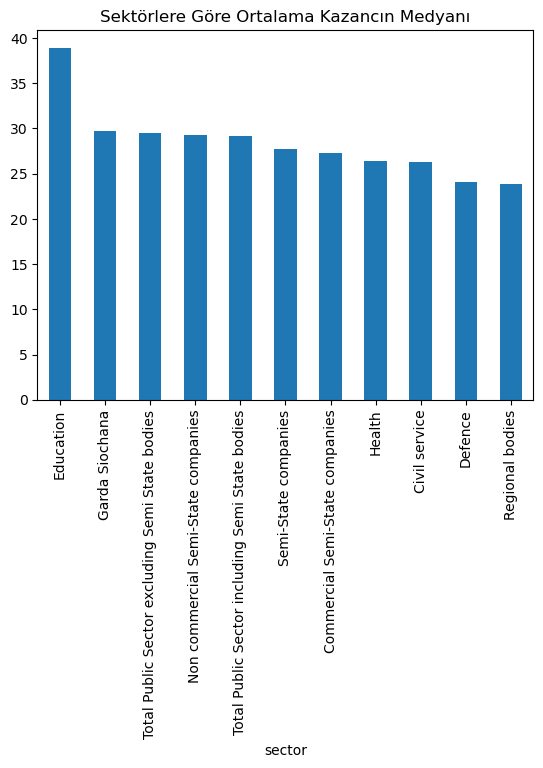

In [26]:
dataframes['avgHrEarns_1_pd'].groupby('sector').median().sort_values(by='avgHrEarns', ascending=False)['avgHrEarns'].plot(kind='bar')
plt.title('Sektörlere Göre Ortalama Kazancın Medyanı')
plt.show()


### Combination Analysis

In [27]:
combined_df = dataframes['avgHrEarns_1_pd'].merge(dataframes['employment'], on=['Quarter', 'sector'], how='inner').merge(dataframes['avgWkPH_1_pd'], on=['Quarter', 'sector'], how='inner')


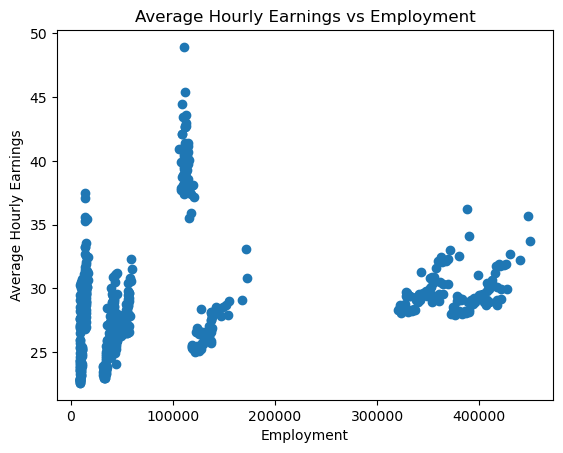

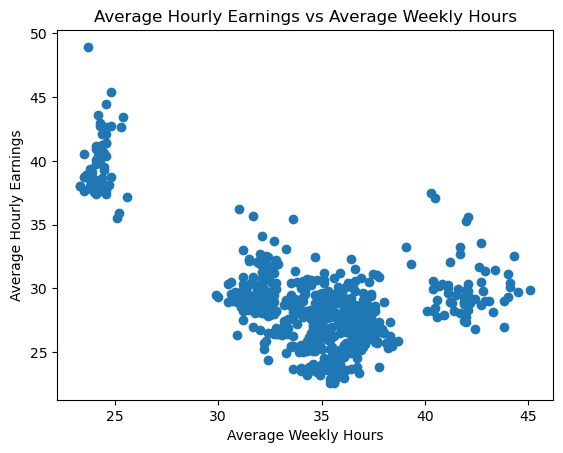

In [28]:
import matplotlib.pyplot as plt

# Average hourly earnings vs employment
plt.scatter(combined_df['Employed'], combined_df['avgHrEarns'])
plt.xlabel('Employment')
plt.ylabel('Average Hourly Earnings')
plt.title('Average Hourly Earnings vs Employment')
plt.show()

# Average hourly earnings vs average weekly hours
plt.scatter(combined_df['avgWkPH'], combined_df['avgHrEarns'])
plt.xlabel('Average Weekly Hours')
plt.ylabel('Average Hourly Earnings')
plt.title('Average Hourly Earnings vs Average Weekly Hours')
plt.show()


###  International Comparisons

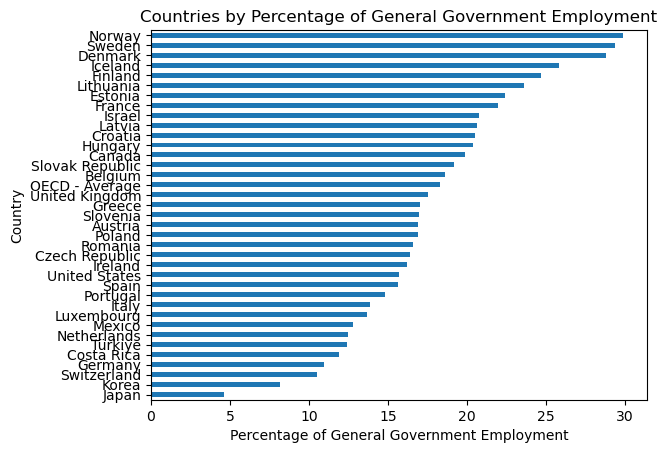

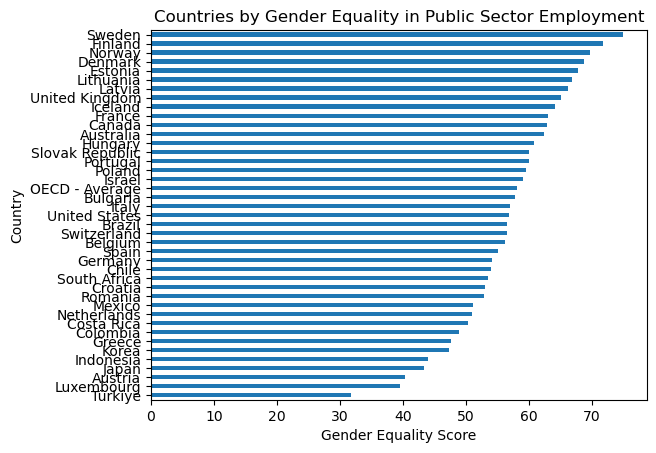

In [29]:
# Plotting general government employment percentages
dataframes['employ_public_pd'].groupby('Country')['Value'].mean().sort_values().plot(kind='barh')
plt.xlabel('Percentage of General Government Employment')
plt.title('Countries by Percentage of General Government Employment')
plt.show()

# Plotting gender equality scores
dataframes['gender_public_pd'].groupby('Country')['Value'].mean().sort_values().plot(kind='barh')
plt.xlabel('Gender Equality Score')
plt.title('Countries by Gender Equality in Public Sector Employment')
plt.show()


### Statistical Analysis

In [30]:
# Basic statistics
print(combined_df.describe())

# For more advanced statistical analyses like ANOVA, you would typically use the stats module from scipy. 
# For instance, to check if there's a statistically significant difference in avg hourly earnings across sectors:
import scipy.stats as stats

sectors = combined_df['sector'].unique()
anova_data = [combined_df['avgHrEarns'][combined_df['sector'] == sector] for sector in sectors]
f_val, p_val = stats.f_oneway(*anova_data)

print(f"F-value: {f_val}")
print(f"P-value: {p_val}")


       avgHrEarns       Employed     avgWkPH
count  671.000000     671.000000  671.000000
mean    28.779106  109408.792846   34.395082
std      4.300627  131198.561708    4.259180
min     22.580000    8800.000000   23.300000
25%     26.260000   14900.000000   32.350000
50%     28.220000   43600.000000   35.100000
75%     29.775000  124800.000000   36.500000
max     48.940000  450000.000000   45.100000
F-value: 378.66873360217664
P-value: 1.0621235104777497e-265


C:\Users\dovle\AppData\Local\Temp\ipykernel_11620\435288725.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm')


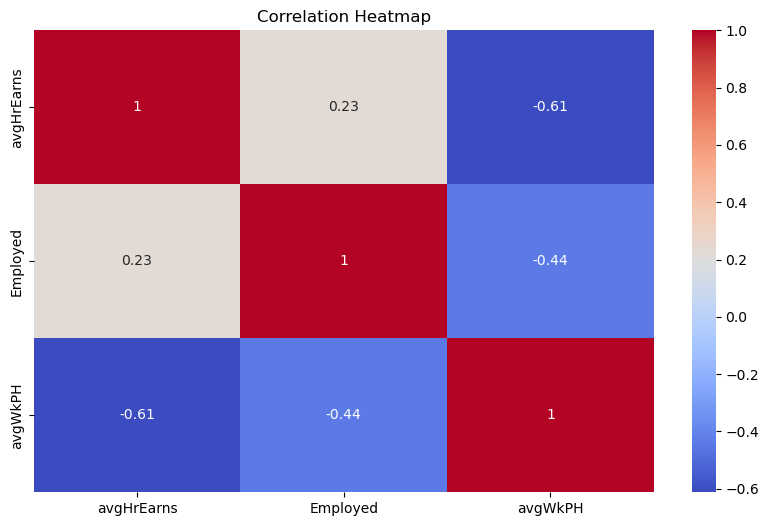

C:\Users\dovle\AppData\Local\Temp\ipykernel_11620\435288725.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_df['avgHrEarns'])


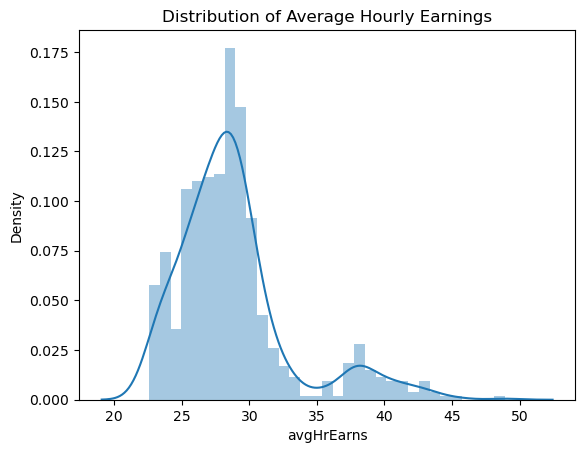

In [31]:
import seaborn as sns

# Heatmap of correlations
plt.figure(figsize=(10,6))
sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of average hourly earnings
sns.distplot(combined_df['avgHrEarns'])
plt.title('Distribution of Average Hourly Earnings')
plt.show()


### Time Series Analysis:
Considering you have data labeled by Quarter, it's possible to perform time series analysis. For simplicity, let's plot a time series for avgHrEarns.

python


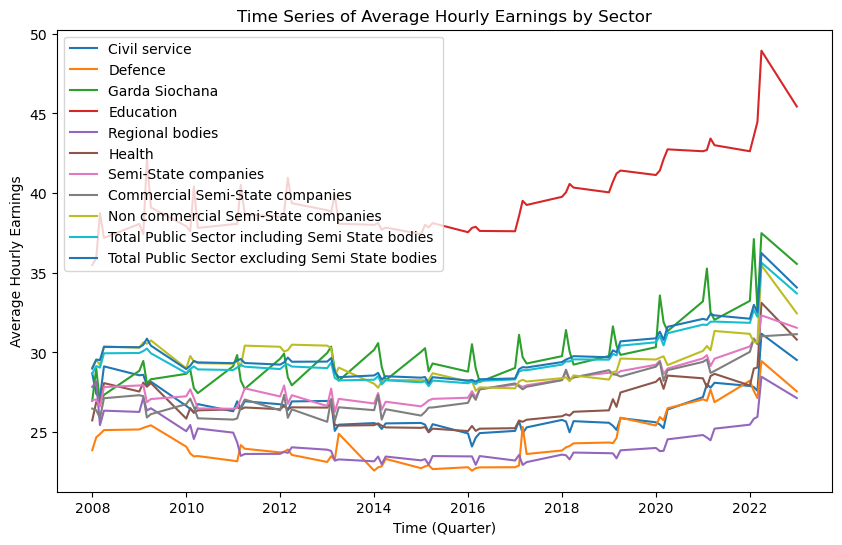

In [33]:
import pandas as pd

# Convert 'Quarter' to datetime format for better plotting
combined_df['Quarter'] = pd.to_datetime(combined_df['Quarter'].str.replace('Q', '-').replace('1', '03').replace('2', '06').replace('3', '09').replace('4', '12'))

# Time series plot
plt.figure(figsize=(10, 6))
for sector in combined_df['sector'].unique():
    subset = combined_df[combined_df['sector'] == sector]
    plt.plot(subset['Quarter'], subset['avgHrEarns'], label=sector)

plt.title('Time Series of Average Hourly Earnings by Sector')
plt.xlabel('Time (Quarter)')
plt.ylabel('Average Hourly Earnings')
plt.legend(loc='best')
plt.show()


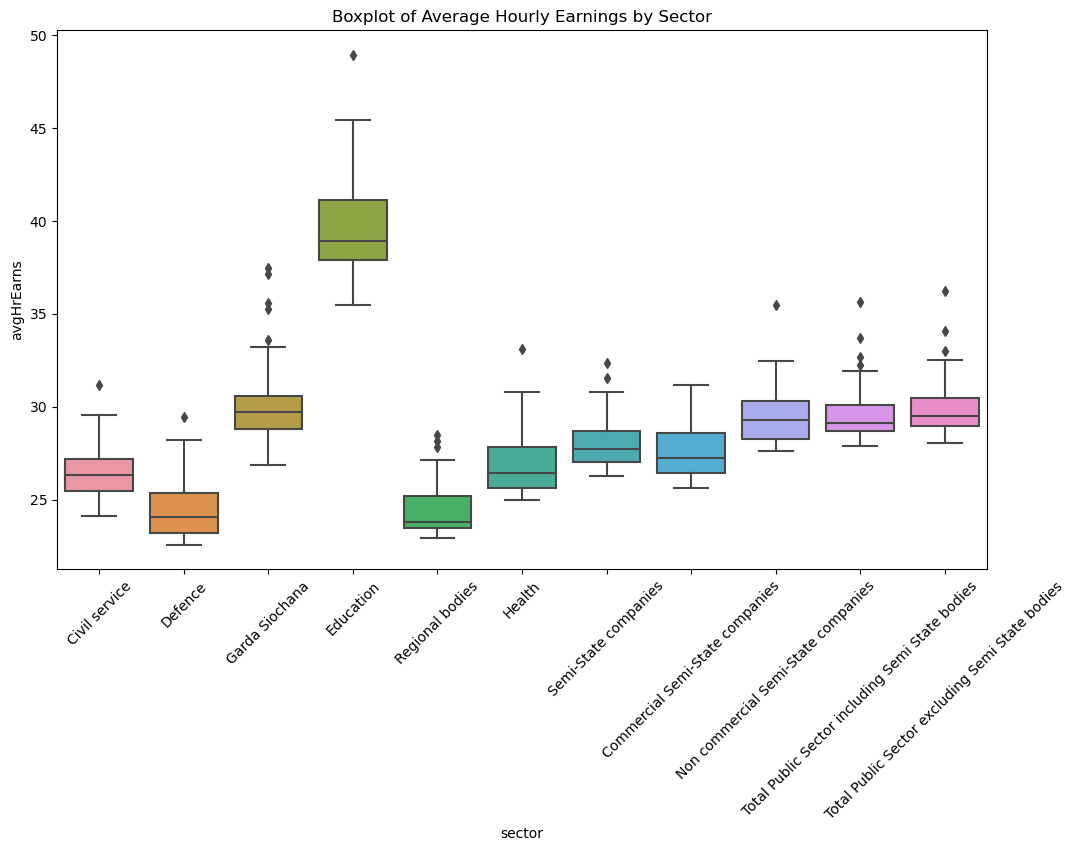

In [34]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='sector', y='avgHrEarns', data=combined_df)
plt.title('Boxplot of Average Hourly Earnings by Sector')
plt.xticks(rotation=45)
plt.show()


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Let's predict 'avgHrEarns' based on 'Employed' and 'avgWkPH'
X = combined_df[['Employed', 'avgWkPH']]
y = combined_df['avgHrEarns']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 13.700682001081185


In [36]:
from sklearn.cluster import KMeans

# Selecting only numeric columns for clustering
cluster_data = combined_df.select_dtypes(include=['float64', 'int64'])
kmeans = KMeans(n_clusters=4)
combined_df['cluster'] = kmeans.fit_predict(cluster_data)

# Check the number of data points in each cluster
print(combined_df['cluster'].value_counts())


C:\Users\dovle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dovle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0    244
3    183
2    122
1    122
Name: cluster, dtype: int64


In [37]:
from sklearn.ensemble import RandomForestRegressor

# Fit a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Display feature importances
importances = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_}).sort_values('importance', ascending=False)
print(importances)


    feature  importance
1   avgWkPH    0.783293
0  Employed    0.216707


C:\Users\dovle\AppData\Local\Temp\ipykernel_11620\796437203.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = combined_df.corr()


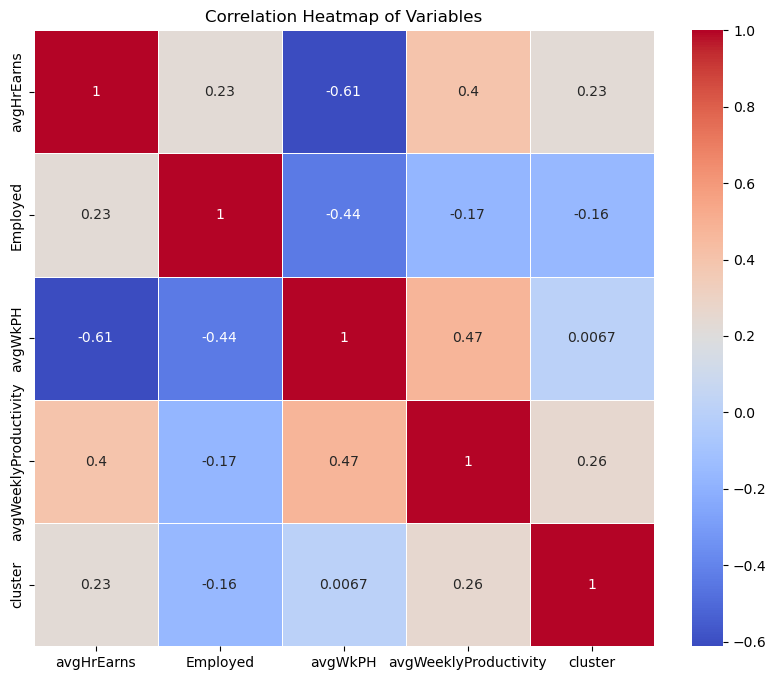

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = combined_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Variables')
plt.show()


In [40]:
combined_df.describe()


,avgHrEarns,Employed,avgWkPH,avgWeeklyProductivity,cluster
count,6.710000e+02,671.000000,6.710000e+02,671.000000,671.000000
mean,5.082869e-16,109408.792846,-2.912060e-16,978.660641,1.363636
std,1.000746e+00,131198.561708,1.000746e+00,120.724550,1.227346
min,-1.442518e+00,8800.000000,-2.606924e+00,789.264000,0.000000
25%,-5.861901e-01,14900.000000,-4.805168e-01,902.375000,0.000000
50%,-1.301026e-01,43600.000000,1.656290e-01,959.868000,1.000000
75%,2.317423e-01,124800.000000,4.945760e-01,1028.192000,3.000000
max,4.691393e+00,450000.000000,2.515250e+00,1510.847000,3.000000


In [41]:
correlations = combined_df.corr()
print(correlations)


                       avgHrEarns  Employed   avgWkPH  avgWeeklyProductivity  \
avgHrEarns               1.000000  0.228806 -0.612310               0.398414   
Employed                 0.228806  1.000000 -0.439212              -0.172650   
avgWkPH                 -0.612310 -0.439212  1.000000               0.471402   
avgWeeklyProductivity    0.398414 -0.172650  0.471402               1.000000   
cluster                  0.225366 -0.164379  0.006738               0.255916   

                        cluster  
avgHrEarns             0.225366  
Employed              -0.164379  
avgWkPH                0.006738  
avgWeeklyProductivity  0.255916  
cluster                1.000000  


C:\Users\dovle\AppData\Local\Temp\ipykernel_11620\1011459476.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = combined_df.corr()


### Normal Distribution Control

In [43]:
from scipy.stats import shapiro

numeric_columns = combined_df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    stat, p = shapiro(combined_df[column])
    print(f'{column}: Statistics={stat}, p={p}')


avgHrEarns: Statistics=0.8592619895935059, p=5.019871405302311e-24
Employed: Statistics=0.7106078267097473, p=2.0278632308923782e-32
avgWkPH: Statistics=0.9155080318450928, p=6.921839611025493e-19
avgWeeklyProductivity: Statistics=0.895707905292511, p=6.3083443076193474e-21


### Hypothesis Tests
I will check for statistically significant differences between certain traits or groups
T-Test (Between two groups)

In [44]:
from scipy.stats import ttest_ind

group1 = combined_df[combined_df['sector'] == 'Civil service']['avgHrEarns']
group2 = combined_df[combined_df['sector'] == 'Defence']['avgHrEarns']

stat, p = ttest_ind(group1, group2)
print(f'Statistics={stat}, p={p}')


Statistics=7.1126363940424, p=8.933839057292848e-11


### ANOVA (Between three or more groups)

In [45]:
from scipy.stats import f_oneway

group1 = combined_df[combined_df['sector'] == 'Civil service']['avgHrEarns']
group2 = combined_df[combined_df['sector'] == 'Defence']['avgHrEarns']
group3 = combined_df[combined_df['sector'] == 'Education']['avgHrEarns']

stat, p = f_oneway(group1, group2, group3)
print(f'Statistics={stat}, p={p}')


Statistics=1172.6394973275476, p=5.843627101385685e-104


In [69]:
merged_data.dropna(inplace=True)


In [70]:
from sklearn.model_selection import train_test_split

X = merged_data.drop('avgHrEarns', axis=1)
y = merged_data['avgHrEarns']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [73]:
for col in merged_data.columns:
    if merged_data[col].dtype == 'O':  # Object tipinde (string gibi) verileri kontrol ediyoruz
        print(col, merged_data[col].unique())


sector ['Civil service' 'Defence' 'Garda Siochana' 'Education' 'Regional bodies'
 'Health' 'Semi-State companies' 'Commercial Semi-State companies'
 'Non commercial Semi-State companies'
 'Total Public Sector including Semi State bodies'
 'Total Public Sector excluding Semi State bodies']


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Bağımsız değişkenler ve hedef değişkeni ayırma
X = merged_data.drop('avgHrEarns', axis=1)  # Hedef değişken dışındaki tüm sütunlar
y = merged_data['avgHrEarns']  # Hedef değişken

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rastgele Orman regresyon modeli oluşturma
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Tahmin yapma
y_pred = rf_model.predict(X_test)

# Modelin hata oranını yazdırma
mse = mean_squared_error(y_test, y_pred)
print(f"Ortalama Kare Hatası (MSE): {mse}")


Ortalama Kare Hatası (MSE): 0.16121299118518692


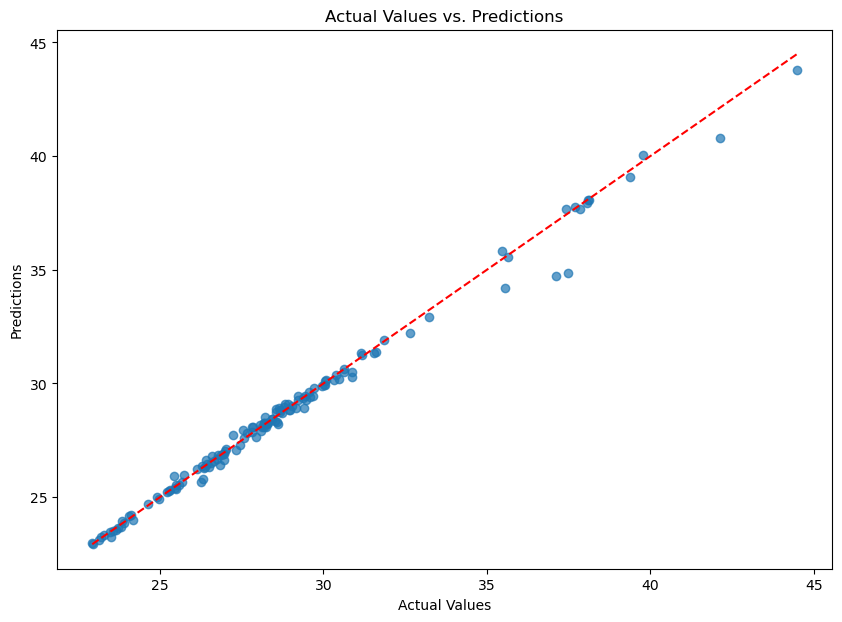

In [80]:
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.title("Actual Values vs. Predictions")
plt.show()


In [83]:
from sklearn.model_selection import GridSearchCV

# Hiperparametre ızgarasını tanımlama
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV ile modeli ayarlama
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# En iyi parametreleri yazdırma
print(grid_search.best_params_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\dovle\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}


In [87]:
!pip install xgboost


                                              0.0/70.9 MB ? eta -:--:--
                                              0.1/70.9 MB 2.6 MB/s eta 0:00:27
                                              0.3/70.9 MB 4.5 MB/s eta 0:00:16
                                              0.4/70.9 MB 4.5 MB/s eta 0:00:16
                                              0.7/70.9 MB 4.5 MB/s eta 0:00:16
                                              1.1/70.9 MB 5.6 MB/s eta 0:00:13
                                              1.4/70.9 MB 6.1 MB/s eta 0:00:12
                                              1.8/70.9 MB 6.6 MB/s eta 0:00:11
     -                                        2.2/70.9 MB 6.9 MB/s eta 0:00:10
     -                                        2.4/70.9 MB 6.8 MB/s eta 0:00:11
     -                                        2.8/70.9 MB 7.0 MB/s eta 0:00:10
     -                                        3.1/70.9 MB 7.0 MB/s eta 0:00:10
     -                                        3.3/70.9 MB 7

In [88]:
import xgboost as xgb

# XGBoost modelini oluşturalım ve eğitelim
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)

# Tahmin yapma
preds = xg_reg.predict(X_test)


In [90]:
from sklearn.ensemble import RandomForestRegressor
rf_best = RandomForestRegressor(n_estimators=100, random_state=42)  # Örnek olarak 100 ağaçla oluşturulmuş bir model


In [96]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [97]:
y_train_pred_gbr = gbr.predict(X_train)
y_test_pred_gbr = gbr.predict(X_test)

print("Eğitim seti hatası:", mean_squared_error(y_train, y_train_pred_gbr))
print("Test seti hatası:", mean_squared_error(y_test, y_test_pred_gbr))


Eğitim seti hatası: 0.010505731625731736
Test seti hatası: 0.0565699365341002


In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [99]:
print("En iyi parametreler:", grid_search.best_params_)

best_gbr = grid_search.best_estimator_
y_test_pred_best_gbr = best_gbr.predict(X_test)
print("Test seti hatası:", mean_squared_error(y_test, y_test_pred_best_gbr))


En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}
Test seti hatası: 0.08232718044813188


In [100]:
feature_importances = best_gbr.feature_importances_
sorted(zip(feature_importances, X.columns), reverse=True)


[(0.6201909301801842, 'avgHrTotLC'),
 (0.34005124256981295, 'avgHrEarnsExIE'),
 (0.014916076441504642, 'avgHrOthLC'),
 (0.011567119139434439, 'avgWkEarns'),
 (0.010569059385858877, 'avgHrIE'),
 (0.0010867207704225999, 'Employed'),
 (0.0006477037518555568, 'avgWkPH'),
 (0.0004718319195150731, 'Year'),
 (0.0003118547598207843, 'sector_Semi-State companies'),
 (0.0001651181473843287, 'Qtr'),
 (1.0225589568456978e-05,
  'sector_Total Public Sector excluding Semi State bodies'),
 (7.990945147758656e-06, 'sector_Commercial Semi-State companies'),
 (1.6664158338865316e-06, 'sector_Non commercial Semi-State companies'),
 (1.6163586515240524e-06, 'sector_Regional bodies'),
 (8.280621478227418e-07, 'sector_Health'),
 (1.5562857128508172e-08, 'sector_Defence'),
 (0.0, 'sector_Total Public Sector including Semi State bodies'),
 (0.0, 'sector_Garda Siochana'),
 (0.0, 'sector_Education')]

### Evaluation of the Model

In [101]:
from sklearn.metrics import mean_absolute_error

y_train_pred = best_gbr.predict(X_train)
y_test_pred = best_gbr.predict(X_test)

print("Eğitim Seti MAE: ", mean_absolute_error(y_train, y_train_pred))
print("Test Seti MAE: ", mean_absolute_error(y_test, y_test_pred))


Eğitim Seti MAE:  0.03255174425656776
Test Seti MAE:  0.15979154941534102


### Saving the Model

In [102]:
import joblib

joblib.dump(best_gbr, "best_gradient_boosting_model.pkl")


['best_gradient_boosting_model.pkl']

In [103]:
loaded_model = joblib.load("best_gradient_boosting_model.pkl")


In [105]:
some_data = X_test.iloc[:5]
some_labels = y_test.iloc[:5]

print("Predictions:", loaded_model.predict(some_data))
print("actual values:", some_labels.tolist())


Predictions: [28.13027447 23.34041645 28.44293437 43.57874992 25.48692354]
actual values: [28.07, 23.51, 28.43, 44.48, 25.48]


### Evaluation of the Model on the Test

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Test seti üzerinde tahmin yapalım
y_pred = best_gbr.predict(X_test)

# Değerlendirme metriklerini hesaplayalım
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ortalama Kare Hata (MSE): {mse}")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse}")
print(f"Ortalama Mutlak Hata (MAE): {mae}")
print(f"R^2 Skoru: {r2}")


Ortalama Kare Hata (MSE): 0.08232718044813188
Kök Ortalama Kare Hata (RMSE): 0.28692713438803913
Ortalama Mutlak Hata (MAE): 0.15979154941534102
R^2 Skoru: 0.995069673143822


### Visualization of Actual Values and Forecasts

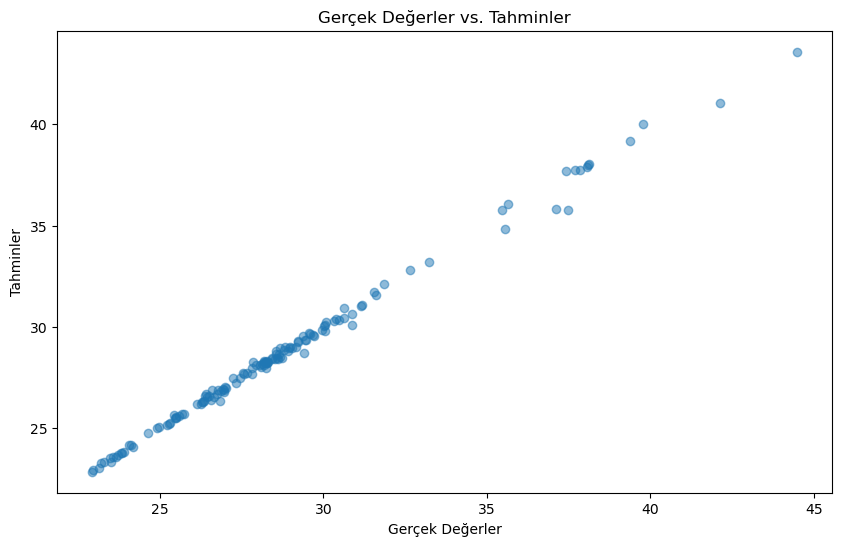

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.title("Gerçek Değerler vs. Tahminler")
plt.show()


### Visualization of Error Distribution

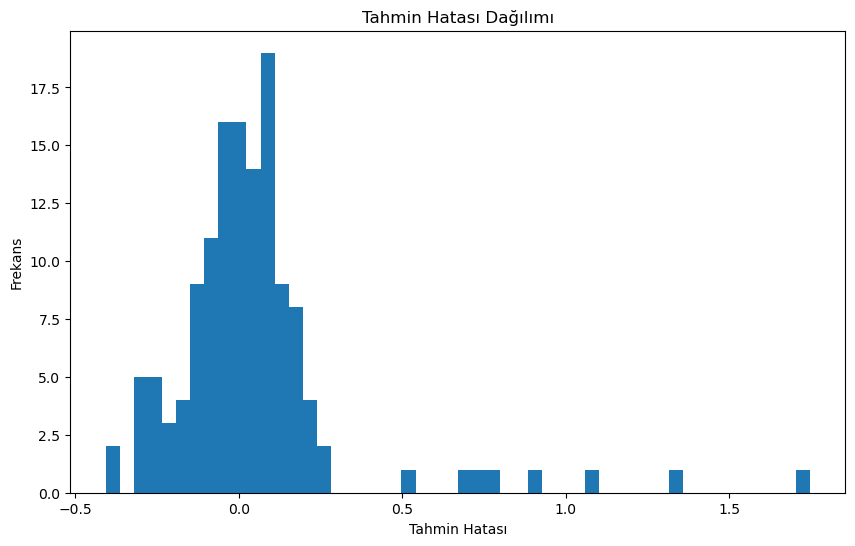

In [109]:
errors = y_test - y_pred
plt.figure(figsize=(10,6))
plt.hist(errors, bins=50)
plt.xlabel("Tahmin Hatası")
plt.ylabel("Frekans")
plt.title("Tahmin Hatası Dağılımı")
plt.show()


### Feature Engineering

In [110]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [111]:
from sklearn.svm import SVR

svr_reg = SVR(kernel="linear")
svr_reg.fit(X_train, y_train)


SVR(kernel='linear')

### Hyper Parameter Tuning

In [112]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

### Evaluating Your Model on the Test Set

In [117]:
final_predictions = rf_best.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(f"Final RMSE: {final_rmse}")


Final RMSE: 4.096288021557515


In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [10, 30, 50], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [10, 30], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

grid_search.best_params_  # En iyi hiperparametreler


{'max_features': 8, 'n_estimators': 50}

In [122]:
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = list(X.columns)
sorted(zip(feature_importances, attributes), reverse=True)


[(0.28095671198997024, 'sector_Education'),
 (0.21938988676685192, 'avgHrEarnsExIE'),
 (0.16335436584028118, 'avgWkPH'),
 (0.15637753826882964, 'avgHrTotLC'),
 (0.08496776718848563, 'avgWkEarns'),
 (0.04259812798802386, 'avgHrOthLC'),
 (0.026289950809257064, 'Employed'),
 (0.007260216819964879, 'Year'),
 (0.006514088203051202, 'avgHrIE'),
 (0.004720504545163212, 'sector_Defence'),
 (0.0023348818586695066, 'sector_Regional bodies'),
 (0.0019556434743148187, 'sector_Garda Siochana'),
 (0.0011702087819960086,
  'sector_Total Public Sector excluding Semi State bodies'),
 (0.000488522973950959, 'sector_Commercial Semi-State companies'),
 (0.00046854068192130614, 'sector_Health'),
 (0.00041832400085059263, 'Qtr'),
 (0.00035374381516896207, 'sector_Semi-State companies'),
 (0.0002389348530900001,
  'sector_Total Public Sector including Semi State bodies'),
 (0.00014204114015910018, 'sector_Non commercial Semi-State companies')]

In [127]:
# Eksik değerleri medyan ile doldurma
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_test_imputed = imputer.fit_transform(X_test)
X_test_prepared = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Modeli test seti üzerinde değerlendirme
final_predictions = final_model.predict(X_test_prepared)

from sklearn.metrics import mean_squared_error
import numpy as np

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Final RMSE:", final_rmse)


Final RMSE: 0.8468493100366005


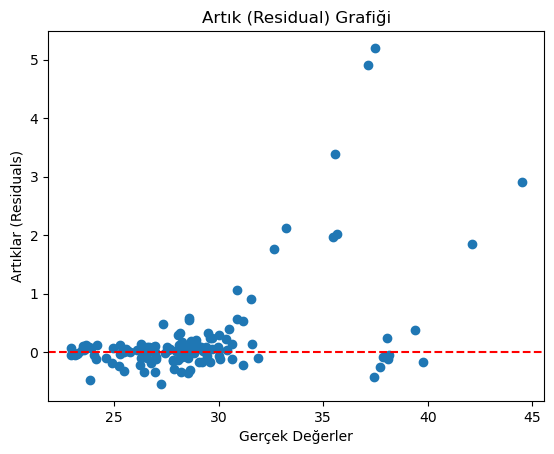

In [129]:
import matplotlib.pyplot as plt

residuals = y_test - final_predictions
plt.scatter(y_test, residuals)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Artıklar (Residuals)")
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Artık (Residual) Grafiği")
plt.show()


In [134]:
from sklearn.svm import SVR

# Creating the SVR model
svr_reg = SVR(kernel='linear')  #Here we use a linear kernel. Different kernels (rbf, poly etc.) can also be tried.

# Modeli eğitme
svr_reg.fit(X_train, y_train)

# Eğitim seti üzerinde tahmin yapma
train_predictions = svr_reg.predict(X_train)

# Doğrulama seti üzerinde tahmin yapma (eğer doğrulama setiniz varsa)
# val_predictions = svr_reg.predict(X_val)

# Performansı değerlendirme (MSE, RMSE gibi metriklerle)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, train_predictions)
rmse = np.sqrt(mse)
print(f"Training set RMSE: {rmse}")


Eğitim seti RMSE: 1336.331191919722


In [136]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [137]:
history = model.fit(X_train, y_train, epochs=20)


Epoch 1/20
15/15 [==============================] - 0s 2ms/step - loss: nan      
Epoch 2/20
15/15 [==============================] - 0s 1ms/step - loss: nan
Epoch 3/20
15/15 [==============================] - 0s 1ms/step - loss: nan
Epoch 4/20
15/15 [==============================] - 0s 1ms/step - loss: nan
Epoch 5/20
15/15 [==============================] - 0s 1ms/step - loss: nan
Epoch 6/20
15/15 [==============================] - 0s 1ms/step - loss: nan
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: nan
Epoch 8/20
15/15 [==============================] - 0s 1ms/step - loss: nan
Epoch 9/20
15/15 [==============================] - 0s 1ms/step - loss: nan
Epoch 10/20
15/15 [==============================] - 0s 1ms/step - loss: nan
Epoch 11/20
15/15 [==============================] - 0s 1ms/step - loss: nan
Epoch 12/20
15/15 [==============================] - 0s 1ms/step - loss: nan
Epoch 13/20
15/15 [==============================] - 0s 1ms/step - loss: nan
Ep

Details are showing for Civil service


,Quarter,sector,Employed
0,2008Q1,Civil service,41700.0
11,2008Q2,Civil service,42700.0
22,2008Q3,Civil service,43000.0
33,2008Q4,Civil service,42700.0
44,2009Q1,Civil service,42200.0


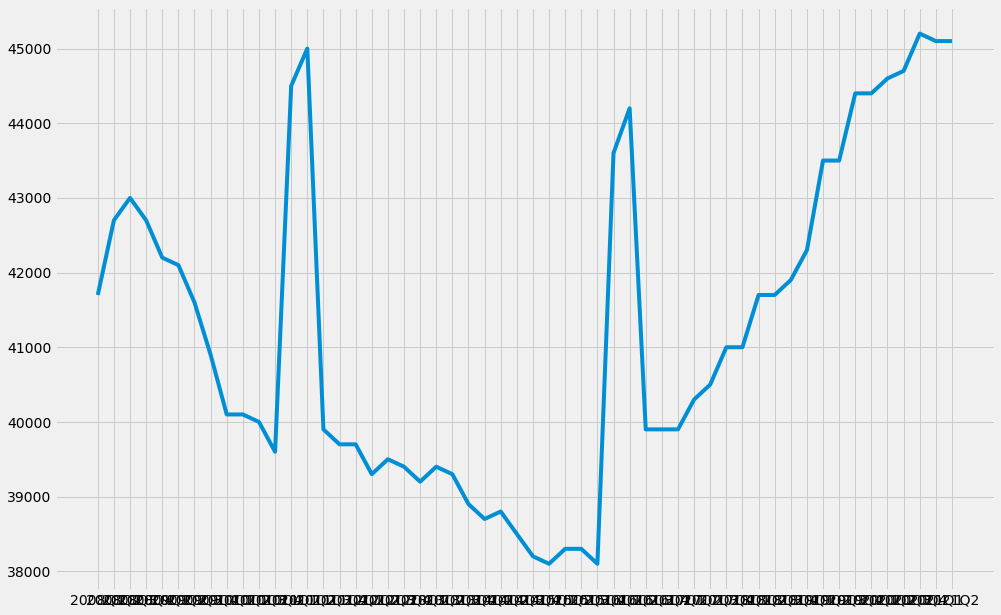

<Figure size 432x288 with 0 Axes>

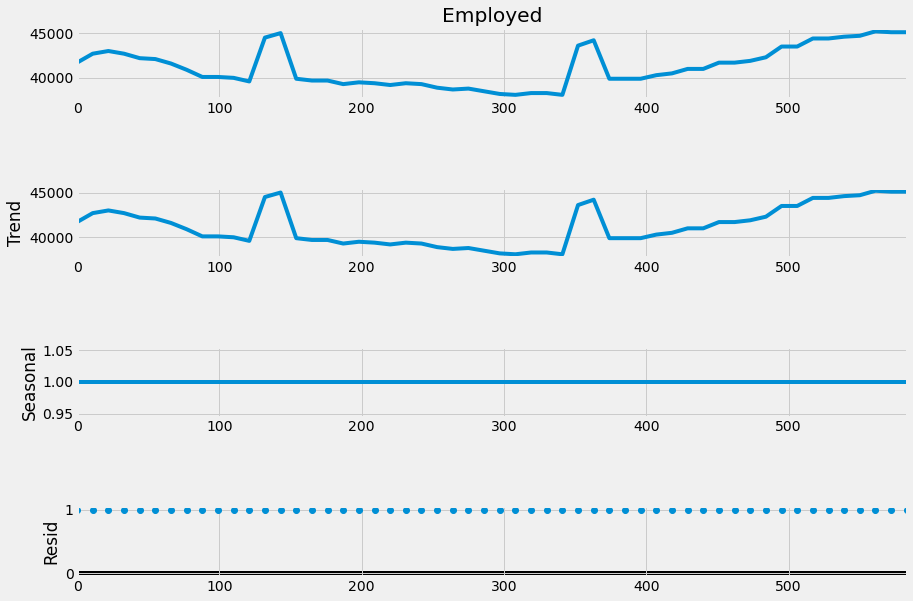

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\

                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -460.733
Date:                Sun, 06 Aug 2023   AIC                            935.467
Time:                        22:44:37   BIC                            949.390
Sample:                             0   HQIC                           940.837
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.123e+04   3869.000     10.656      0.000    3.36e+04    4.88e+04
ar.L1          0.8557      2.266      0.378      0.706      -3.585       5.297
ar.L2         -0.0468      1.699     -0.028      0.9

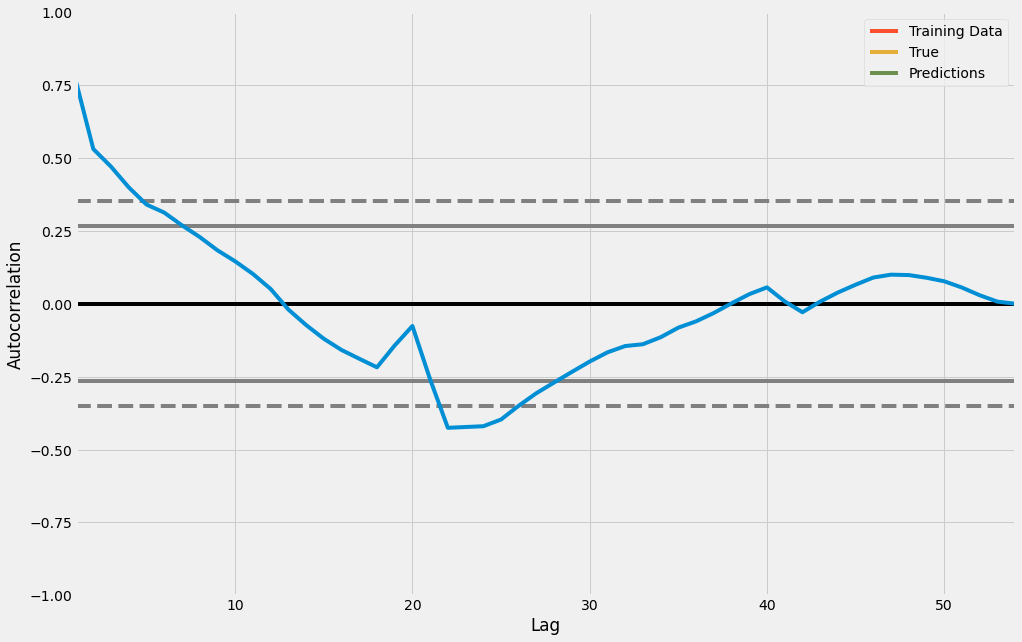

Details are showing for Defence


,Quarter,sector,Employed
1,2008Q1,Defence,11200.0
12,2008Q2,Defence,11100.0
23,2008Q3,Defence,11200.0
34,2008Q4,Defence,11200.0
45,2009Q1,Defence,11200.0


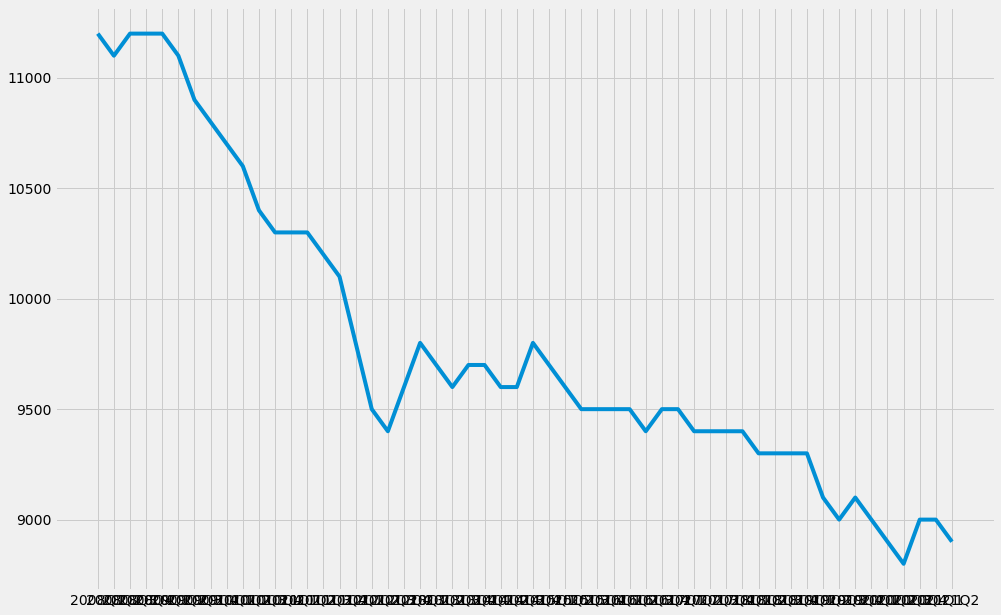

<Figure size 432x288 with 0 Axes>

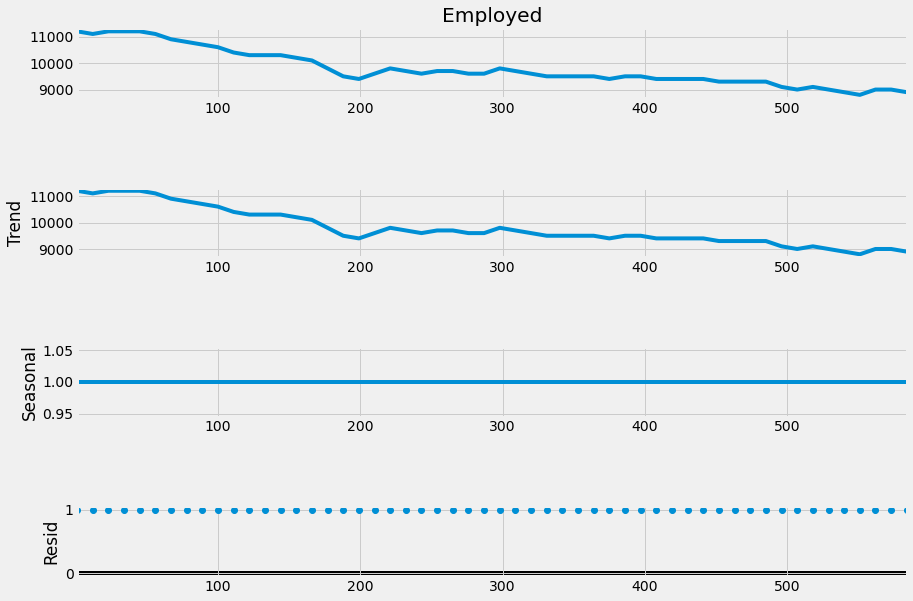

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\

                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -328.795
Date:                Sun, 06 Aug 2023   AIC                            671.589
Time:                        22:44:38   BIC                            685.512
Sample:                             0   HQIC                           676.959
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9790.7673   1438.851      6.805      0.000    6970.671    1.26e+04
ar.L1          0.8302      0.241      3.441      0.001       0.357       1.303
ar.L2         -0.5747      0.321     -1.788      0.0

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


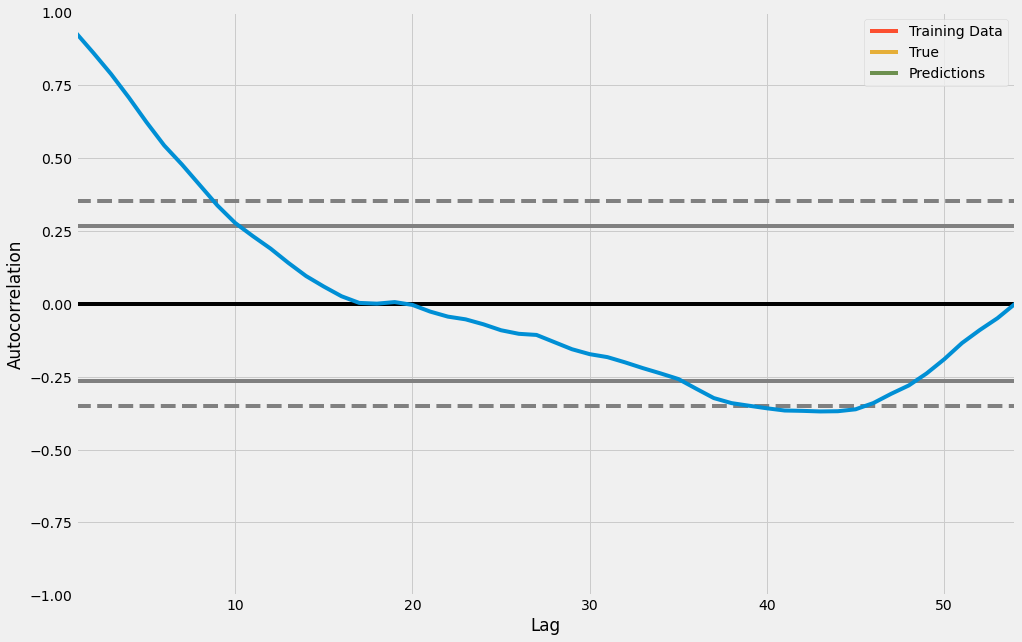

Details are showing for Garda Siochana


,Quarter,sector,Employed
2,2008Q1,Garda Siochana,14900.0
13,2008Q2,Garda Siochana,15100.0
24,2008Q3,Garda Siochana,14200.0
35,2008Q4,Garda Siochana,15300.0
46,2009Q1,Garda Siochana,14600.0


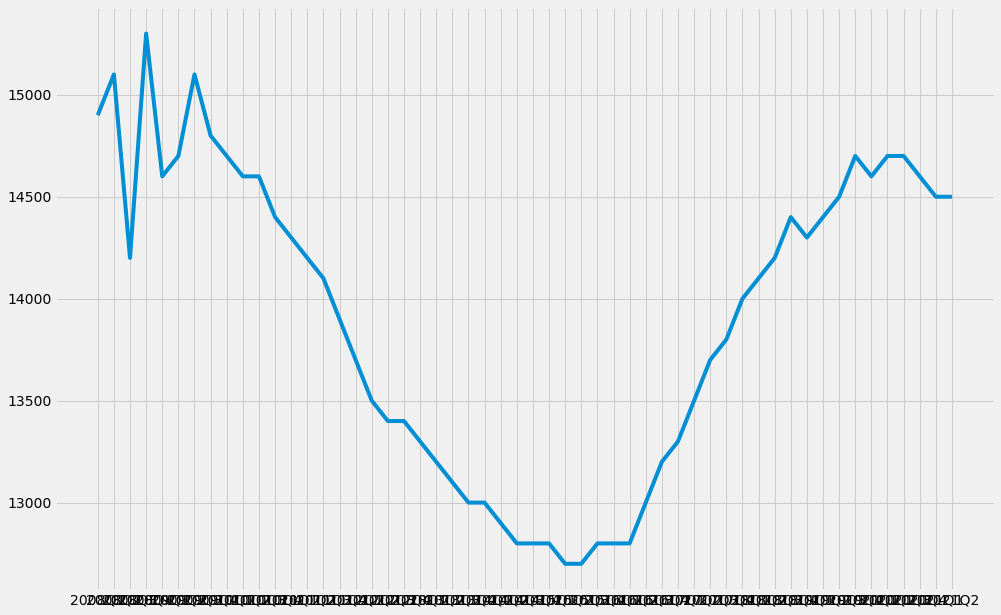

<Figure size 432x288 with 0 Axes>

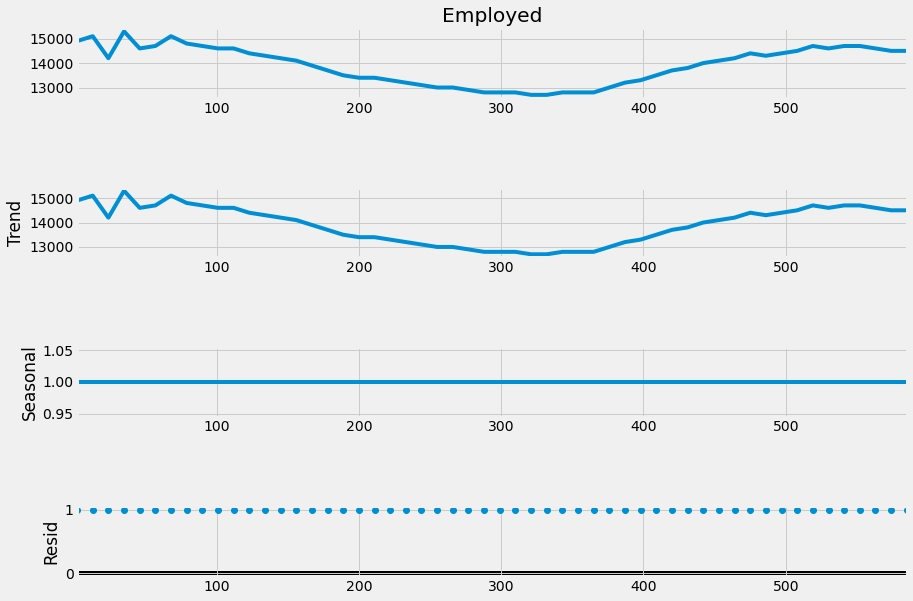

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -355.175
Date:                Sun, 06 Aug 2023   AIC                            724.350
Time:                        22:44:40   BIC                            738.273
Sample:                             0   HQIC                           729.720
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.385e+04    159.822     86.660      0.000    1.35e+04    1.42e+04
ar.L1          1.5067      0.205      7.362      0.000       1.106       1.908
ar.L2         -0.0693      0.404     -0.172      0.8

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


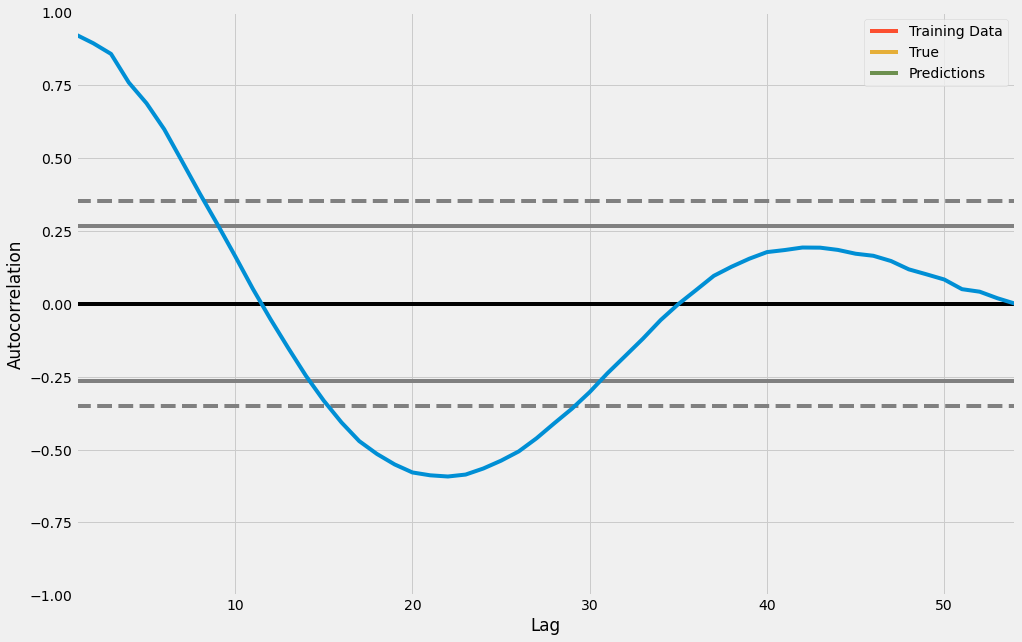

Details are showing for Education


,Quarter,sector,Employed
3,2008Q1,Education,116100.0
14,2008Q2,Education,117400.0
25,2008Q3,Education,113200.0
36,2008Q4,Education,120500.0
47,2009Q1,Education,120200.0


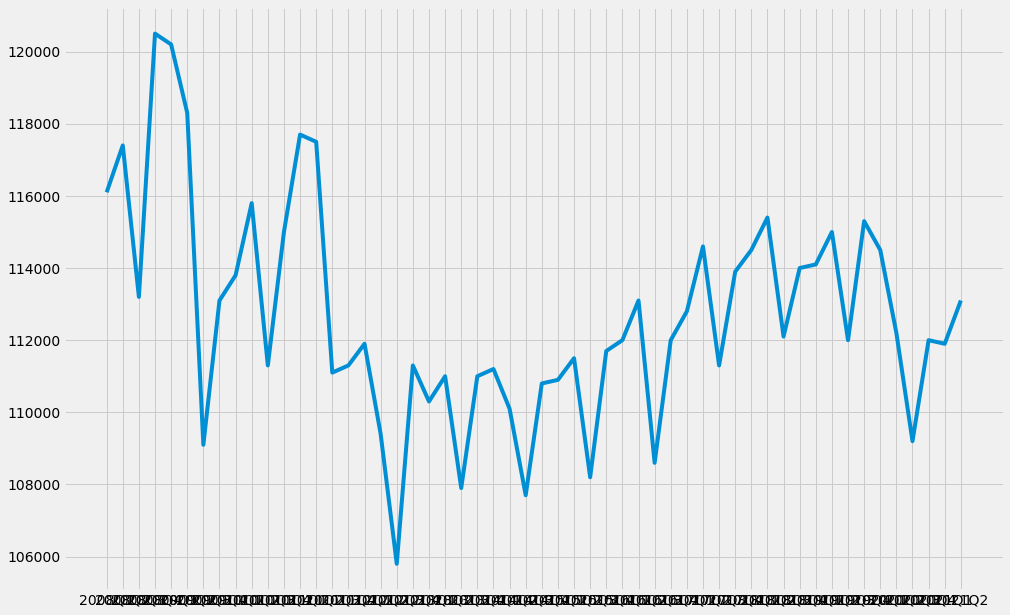

<Figure size 432x288 with 0 Axes>

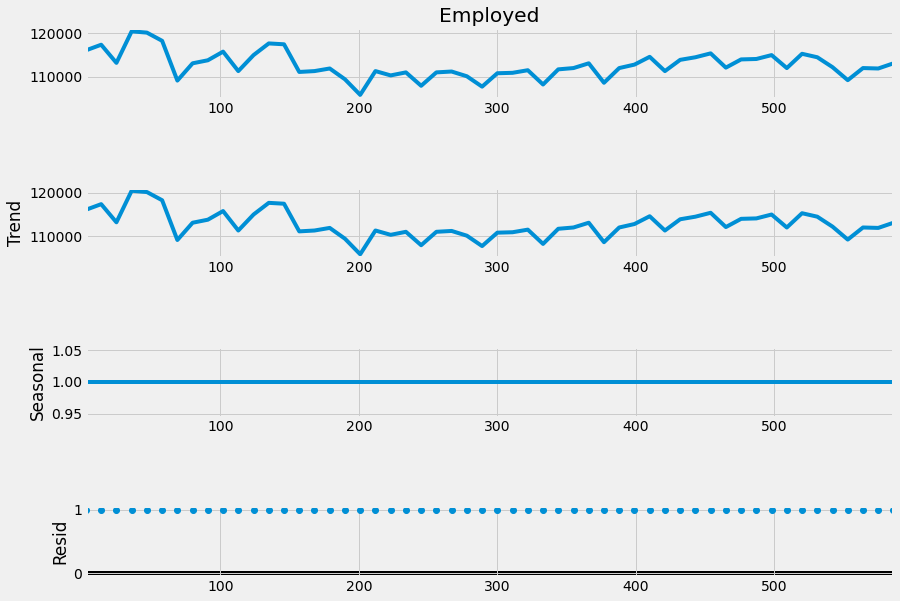

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\

                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -489.522
Date:                Sun, 06 Aug 2023   AIC                            993.044
Time:                        22:44:41   BIC                           1006.967
Sample:                             0   HQIC                           998.413
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.127e+05    696.237    161.875      0.000    1.11e+05    1.14e+05
ar.L1         -0.5723      0.251     -2.278      0.023      -1.065      -0.080
ar.L2          0.3273      0.199      1.646      0.1

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


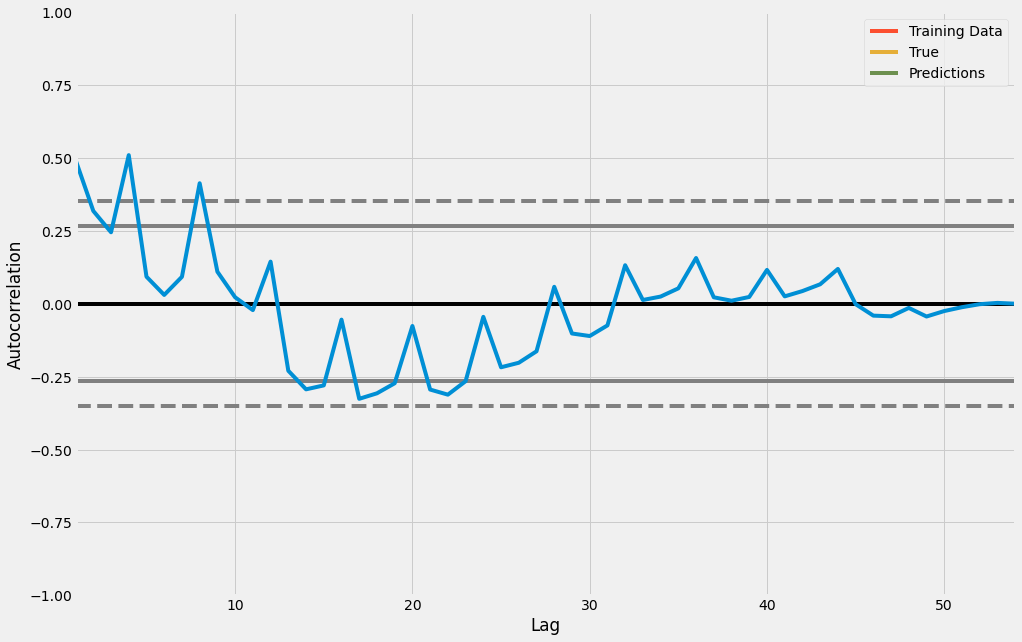

Details are showing for Regional bodies


,Quarter,sector,Employed
4,2008Q1,Regional bodies,38900.0
15,2008Q2,Regional bodies,40100.0
26,2008Q3,Regional bodies,40700.0
37,2008Q4,Regional bodies,40200.0
48,2009Q1,Regional bodies,38400.0


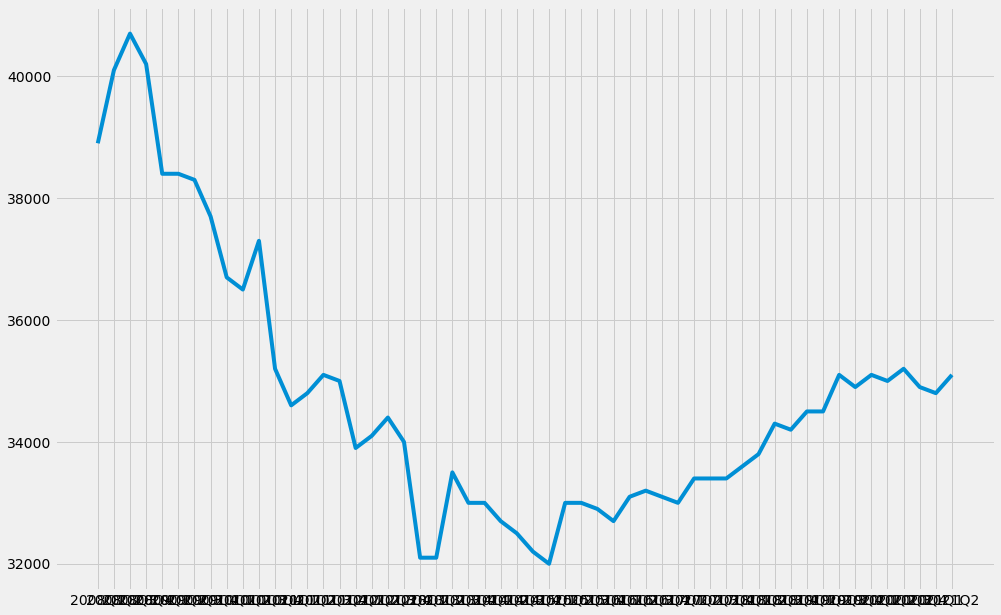

<Figure size 432x288 with 0 Axes>

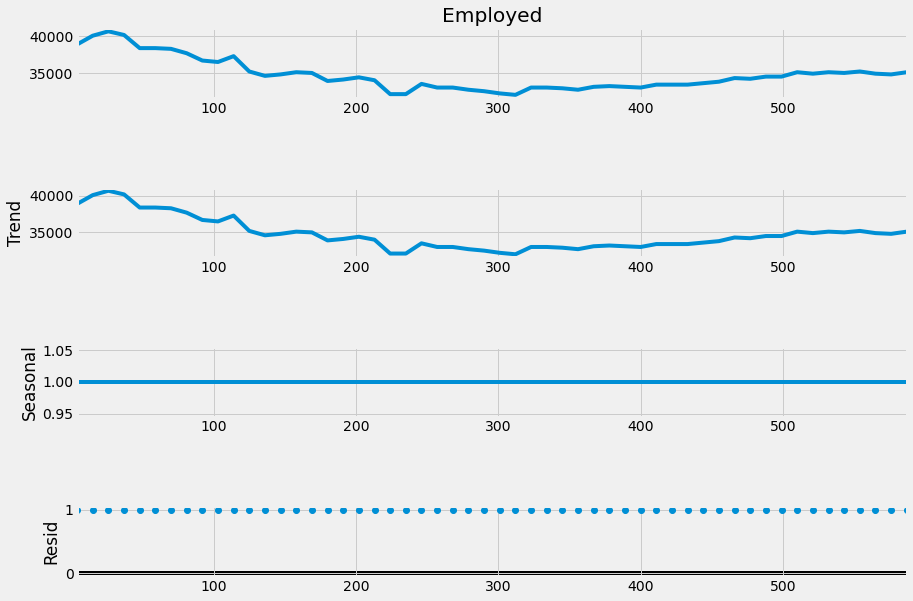

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\

                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -418.804
Date:                Sun, 06 Aug 2023   AIC                            851.609
Time:                        22:44:43   BIC                            865.532
Sample:                             0   HQIC                           856.978
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.475e+04   2435.026     14.272      0.000       3e+04    3.95e+04
ar.L1          0.9563      0.043     22.140      0.000       0.872       1.041
ar.L2         -0.9514      0.059    -16.202      0.0

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


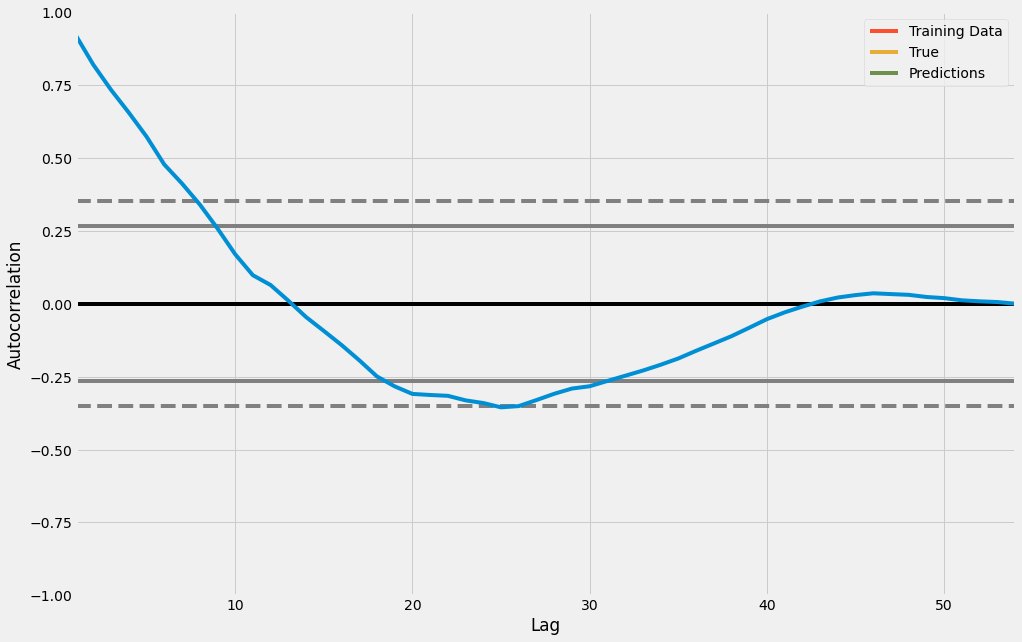

Details are showing for Health


,Quarter,sector,Employed
5,2008Q1,Health,137800.0
16,2008Q2,Health,138000.0
27,2008Q3,Health,137800.0
38,2008Q4,Health,139600.0
49,2009Q1,Health,137700.0


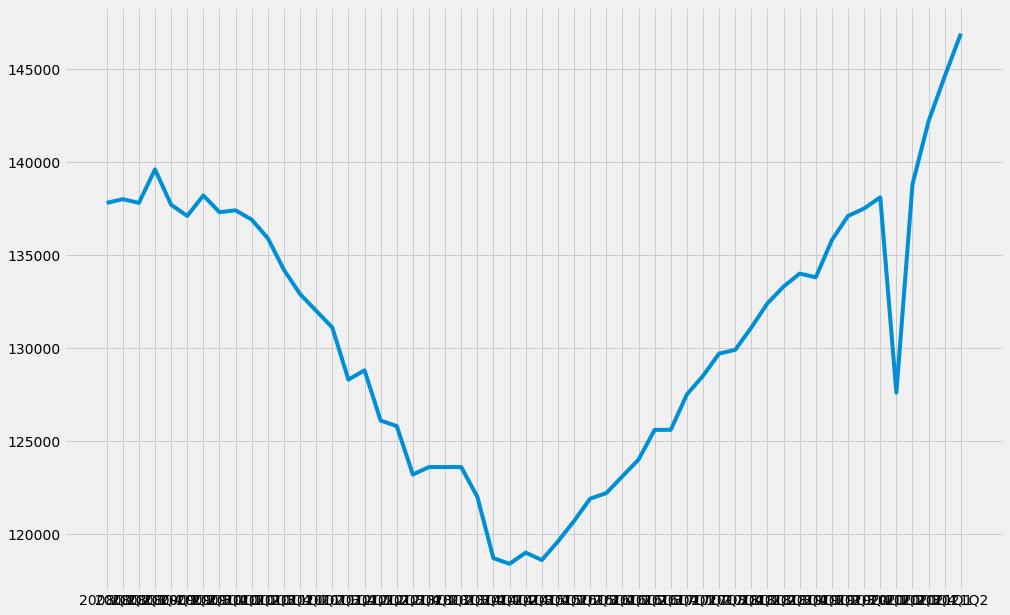

<Figure size 432x288 with 0 Axes>

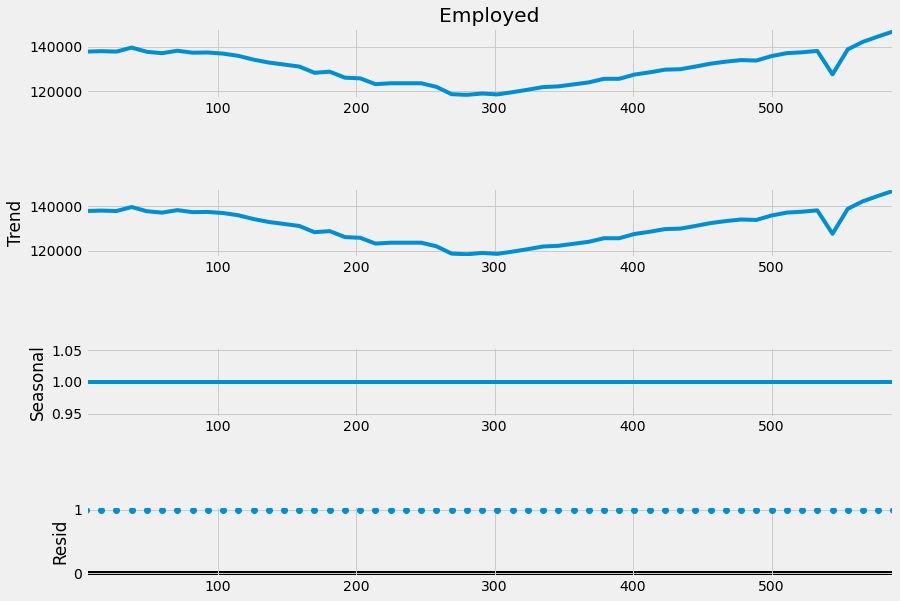

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\

                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -499.436
Date:                Sun, 06 Aug 2023   AIC                           1012.872
Time:                        22:44:44   BIC                           1026.794
Sample:                             0   HQIC                          1018.241
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.307e+05   9205.822     14.192      0.000    1.13e+05    1.49e+05
ar.L1         -0.2697      0.550     -0.490      0.624      -1.348       0.809
ar.L2          0.2911      0.406      0.716      0.4

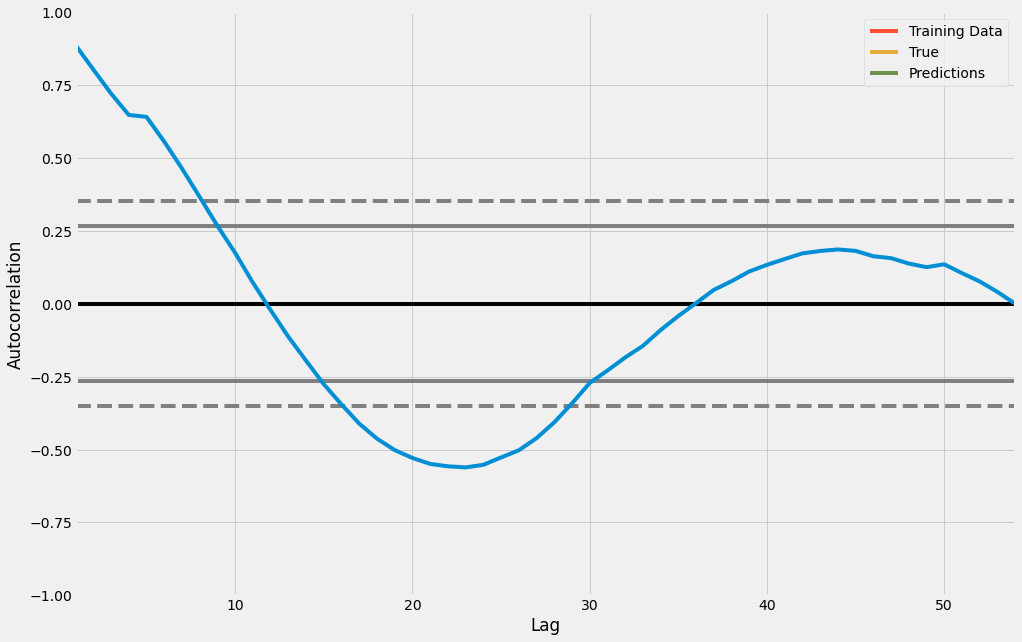

Details are showing for Semi-State companies


,Quarter,sector,Employed
6,2008Q1,Semi-State companies,56400.0
17,2008Q2,Semi-State companies,56900.0
28,2008Q3,Semi-State companies,57000.0
39,2008Q4,Semi-State companies,57800.0
50,2009Q1,Semi-State companies,56900.0


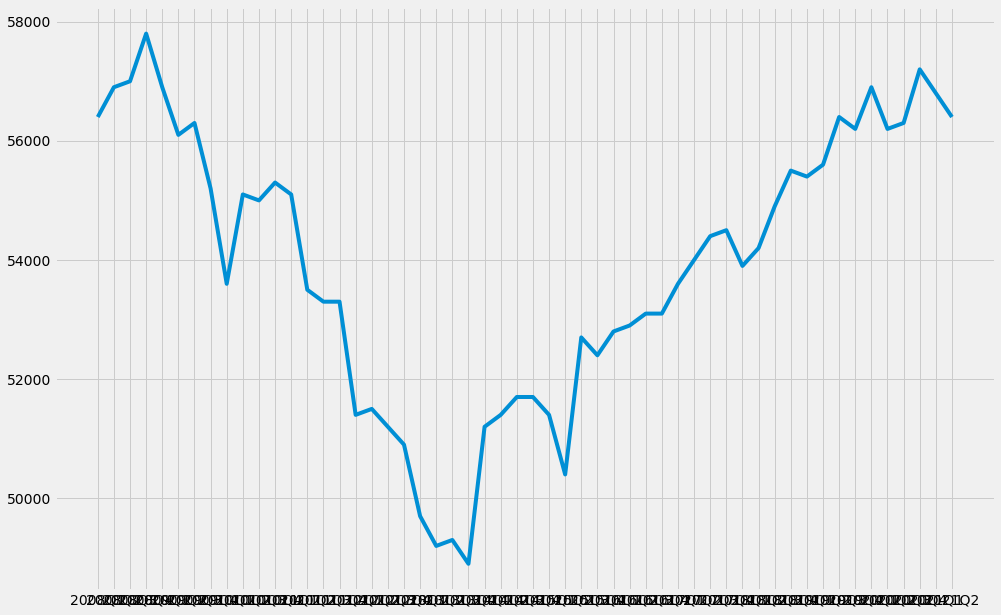

<Figure size 432x288 with 0 Axes>

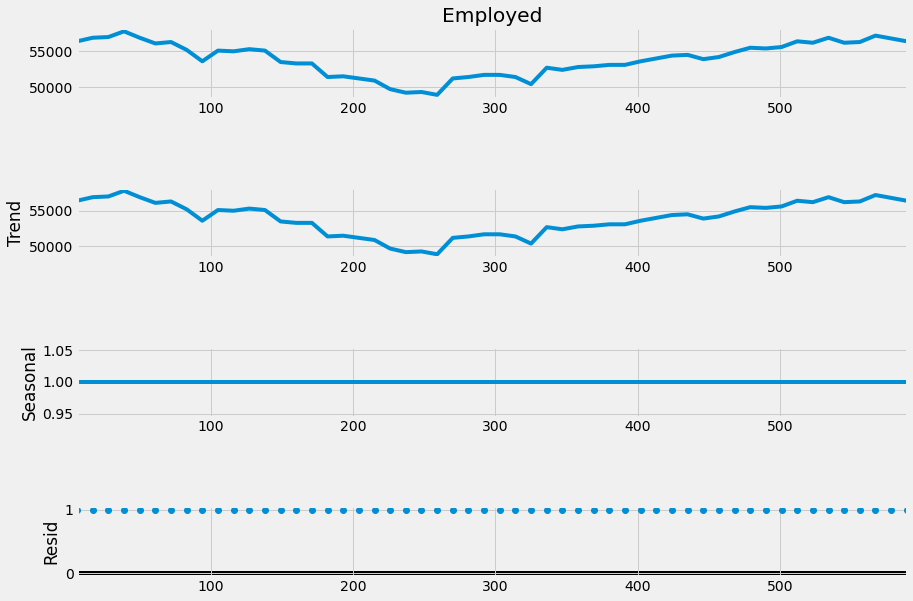

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\

                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -436.466
Date:                Sun, 06 Aug 2023   AIC                            886.932
Time:                        22:44:45   BIC                            900.855
Sample:                             0   HQIC                           892.302
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.393e+04   1712.348     31.493      0.000    5.06e+04    5.73e+04
ar.L1          1.4271      0.274      5.208      0.000       0.890       1.964
ar.L2         -1.2767      0.417     -3.065      0.0

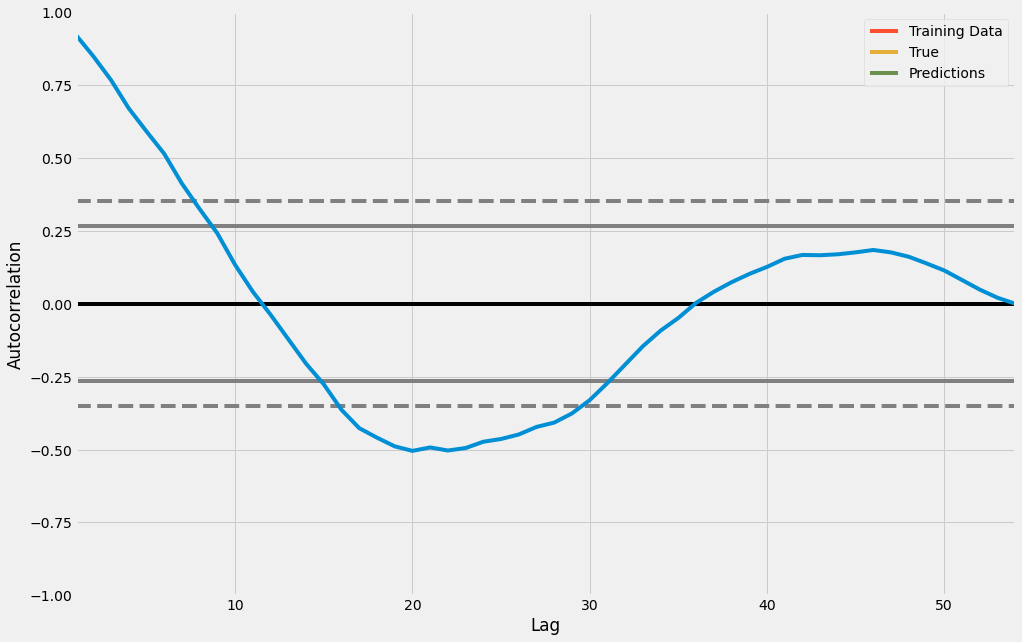

Details are showing for Commercial Semi-State companies


,Quarter,sector,Employed
7,2008Q1,Commercial Semi-State companies,44900.0
18,2008Q2,Commercial Semi-State companies,45100.0
29,2008Q3,Commercial Semi-State companies,45300.0
40,2008Q4,Commercial Semi-State companies,46000.0
51,2009Q1,Commercial Semi-State companies,45000.0


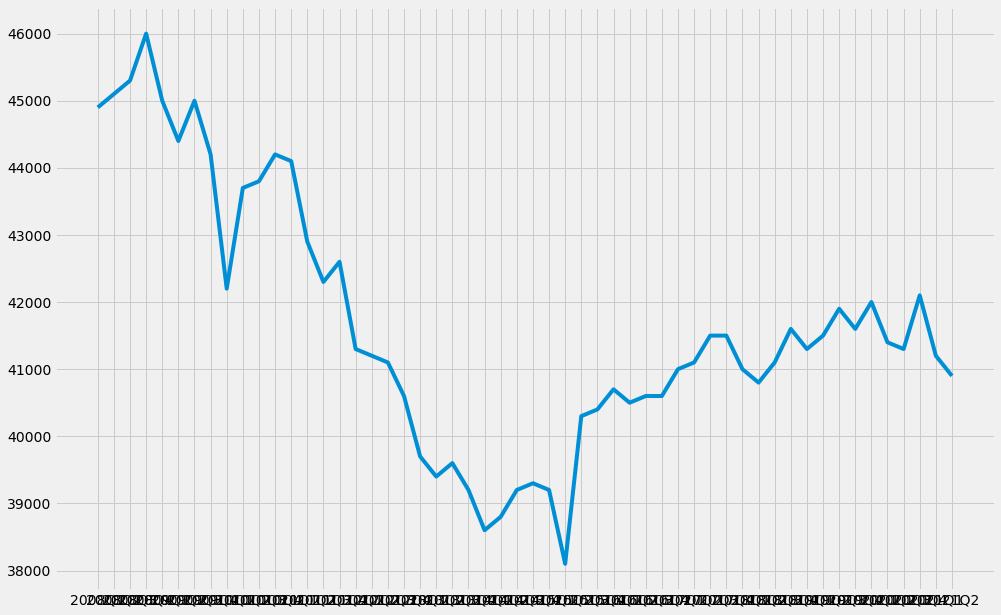

<Figure size 432x288 with 0 Axes>

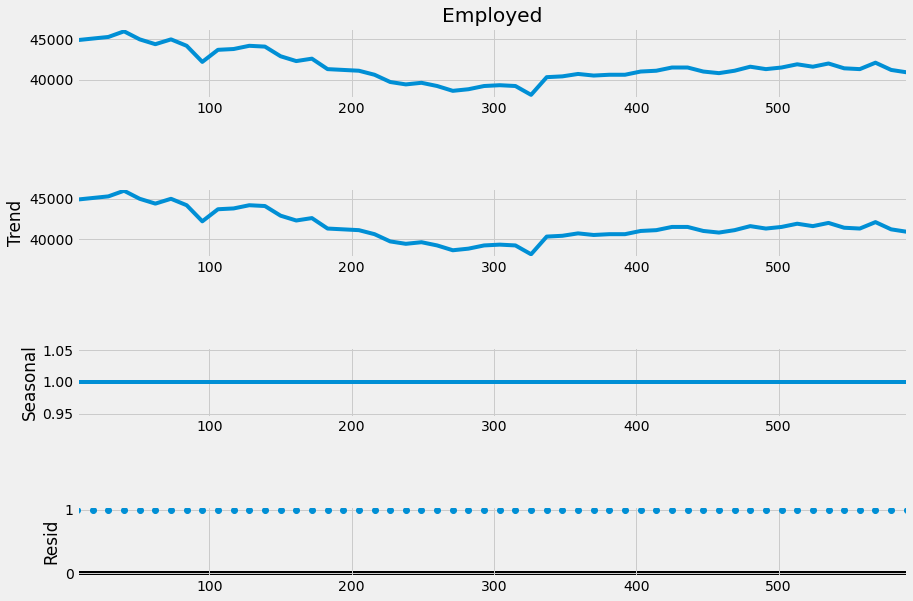

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -426.343
Date:                Sun, 06 Aug 2023   AIC                            866.686
Time:                        22:44:47   BIC                            880.609
Sample:                             0   HQIC                           872.056
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.165e+04   1272.664     32.724      0.000    3.92e+04    4.41e+04
ar.L1         -0.0445      0.062     -0.720      0.472      -0.166       0.077
ar.L2         -0.0482      0.076     -0.631      0.5

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


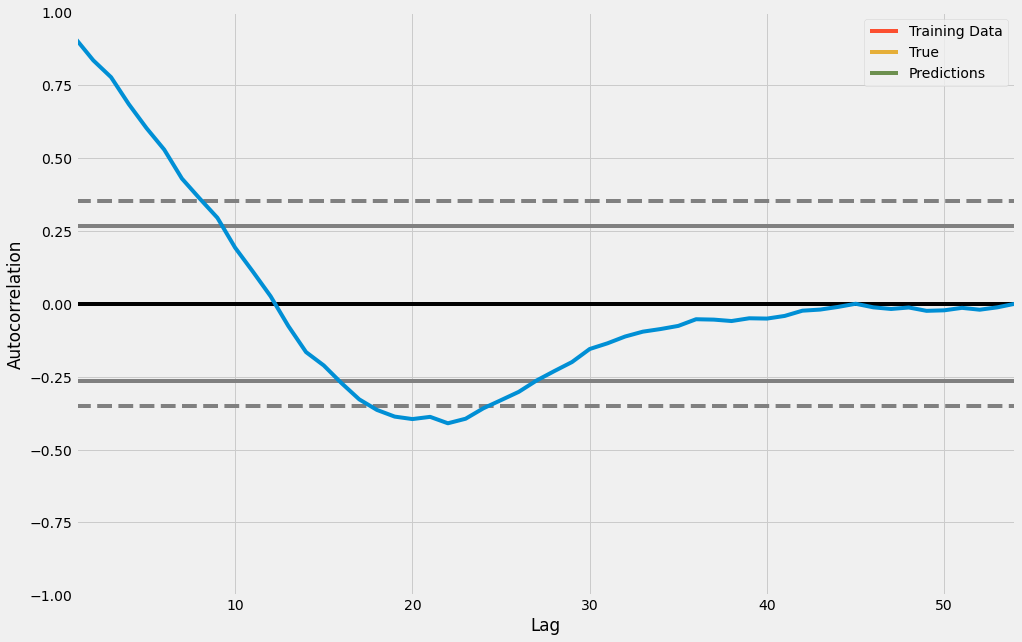

Details are showing for Non commercial Semi-State companies


,Quarter,sector,Employed
8,2008Q1,Non commercial Semi-State companies,11500.0
19,2008Q2,Non commercial Semi-State companies,11800.0
30,2008Q3,Non commercial Semi-State companies,11700.0
41,2008Q4,Non commercial Semi-State companies,11800.0
52,2009Q1,Non commercial Semi-State companies,11900.0


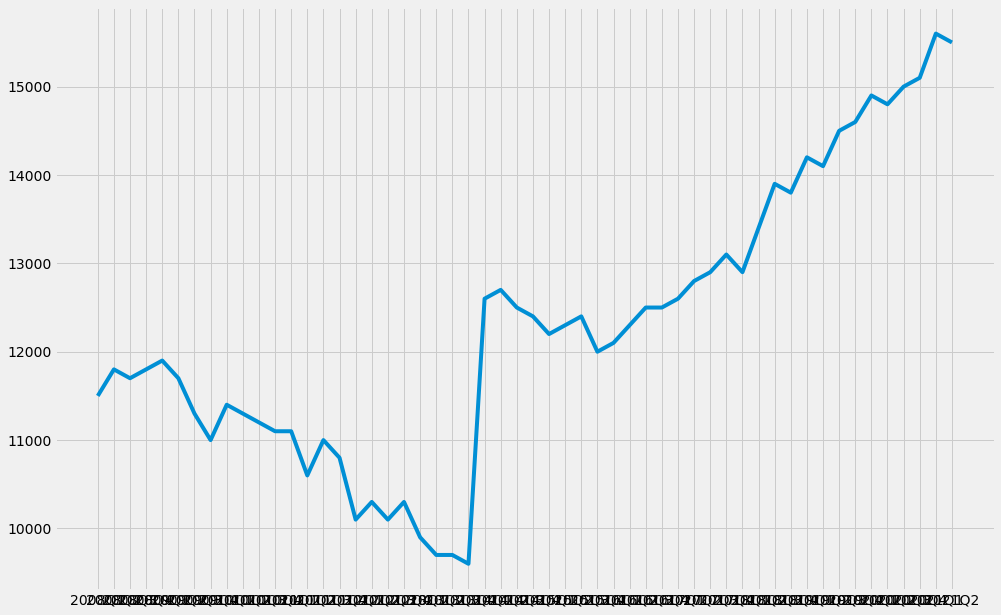

<Figure size 432x288 with 0 Axes>

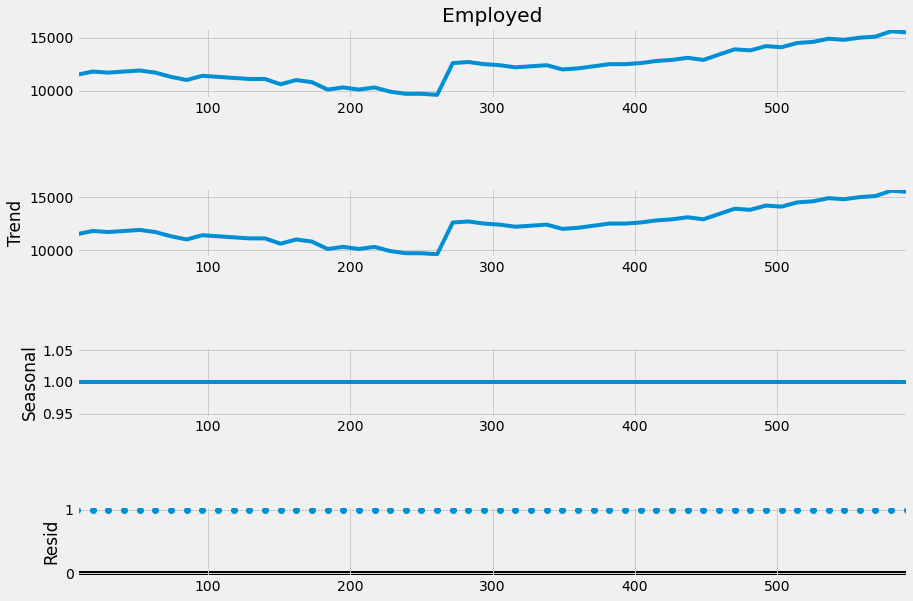

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\

                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -411.576
Date:                Sun, 06 Aug 2023   AIC                            837.151
Time:                        22:44:48   BIC                            851.074
Sample:                             0   HQIC                           842.521
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.228e+04   3419.332      3.591      0.000    5577.905     1.9e+04
ar.L1         -0.5764      0.379     -1.522      0.128      -1.319       0.166
ar.L2          0.5146      0.310      1.661      0.0

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


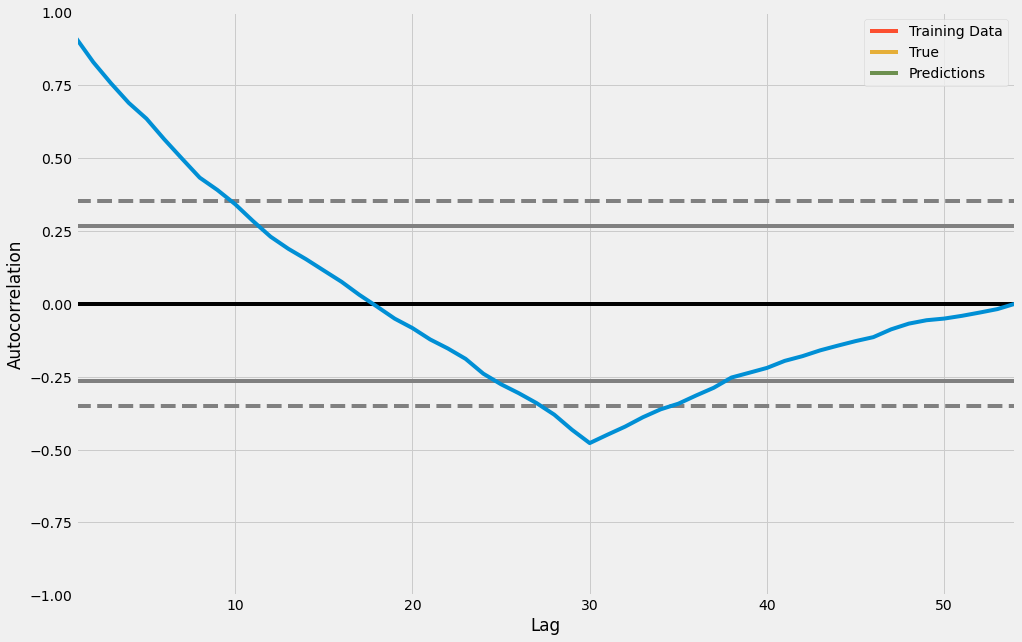

Details are showing for Total Public Sector including Semi State bodies


,Quarter,sector,Employed
9,2008Q1,Total Public Sector including Semi State bodies,417000.0
20,2008Q2,Total Public Sector including Semi State bodies,421400.0
31,2008Q3,Total Public Sector including Semi State bodies,417100.0
42,2008Q4,Total Public Sector including Semi State bodies,427300.0
53,2009Q1,Total Public Sector including Semi State bodies,421200.0


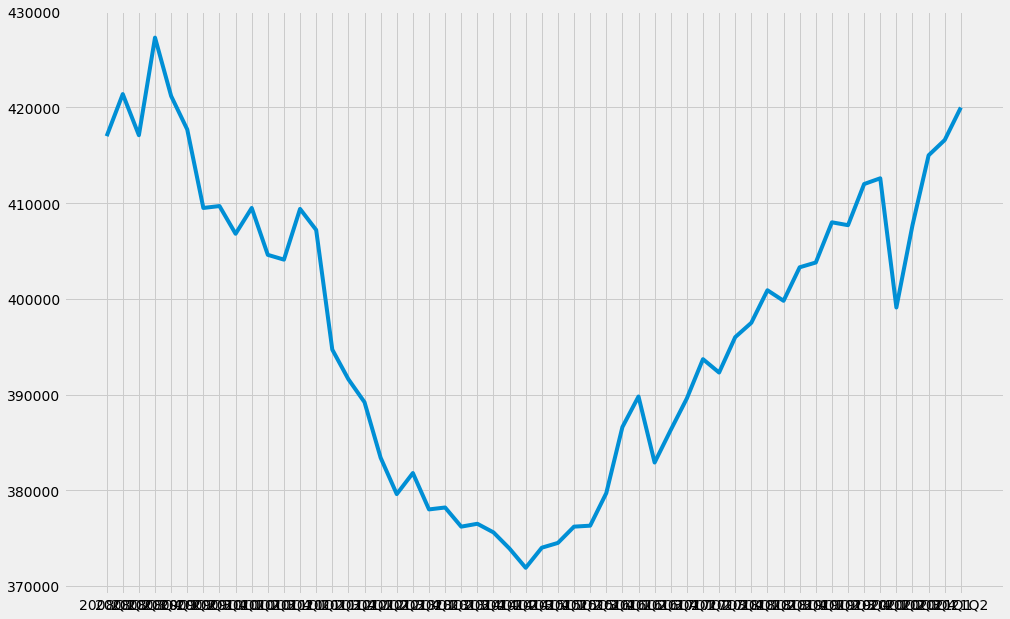

<Figure size 432x288 with 0 Axes>

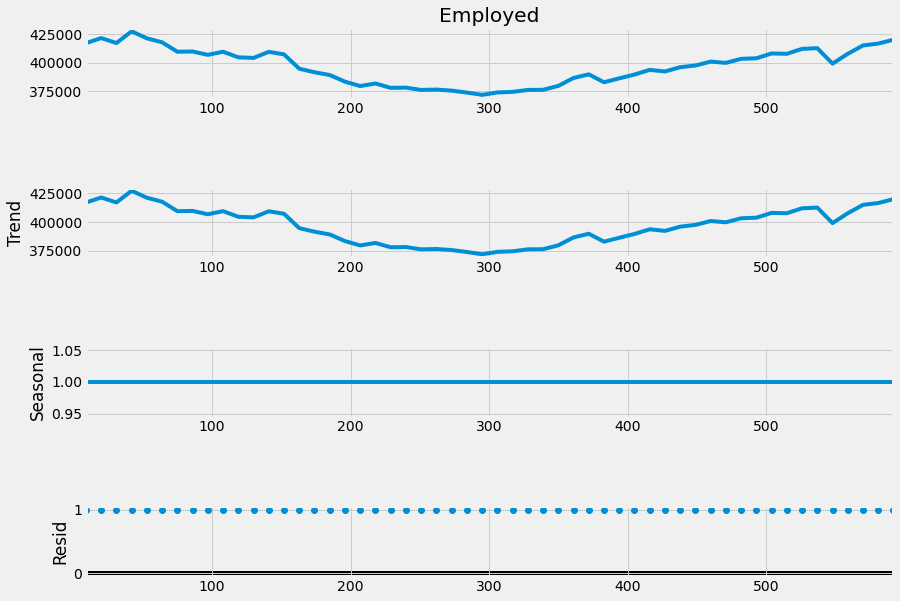

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\

                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -532.268
Date:                Sun, 06 Aug 2023   AIC                           1078.536
Time:                        22:44:49   BIC                           1092.459
Sample:                             0   HQIC                          1083.905
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.969e+05   1.18e+04     33.760      0.000    3.74e+05     4.2e+05
ar.L1         -0.0899      0.086     -1.048      0.294      -0.258       0.078
ar.L2          0.0500      0.119      0.419      0.6

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


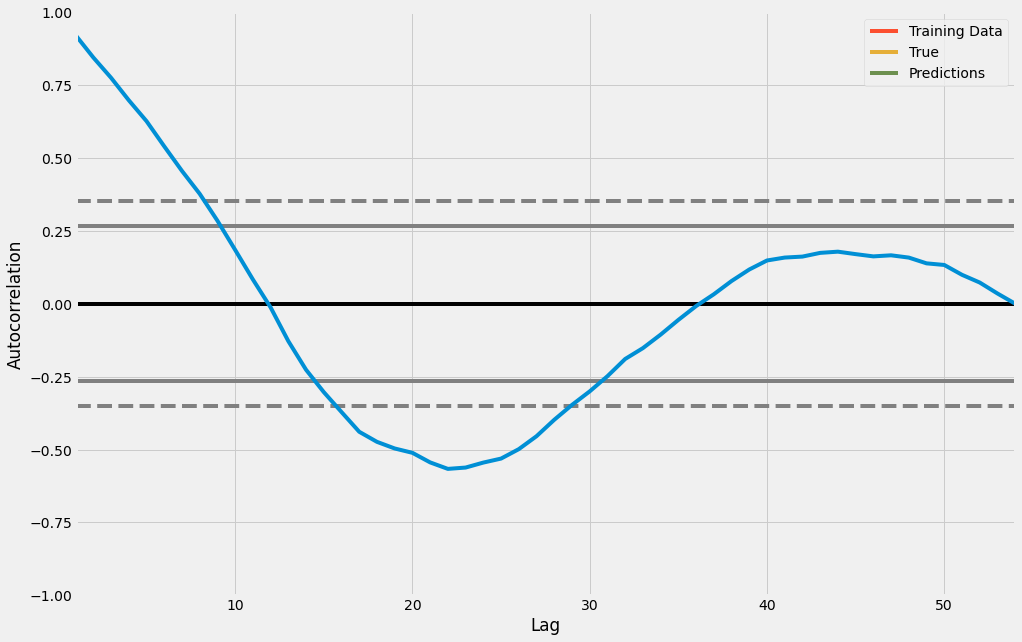

Details are showing for Total Public Sector excluding Semi State bodies


,Quarter,sector,Employed
10,2008Q1,Total Public Sector excluding Semi State bodies,360600.0
21,2008Q2,Total Public Sector excluding Semi State bodies,364500.0
32,2008Q3,Total Public Sector excluding Semi State bodies,360100.0
43,2008Q4,Total Public Sector excluding Semi State bodies,369500.0
54,2009Q1,Total Public Sector excluding Semi State bodies,364300.0


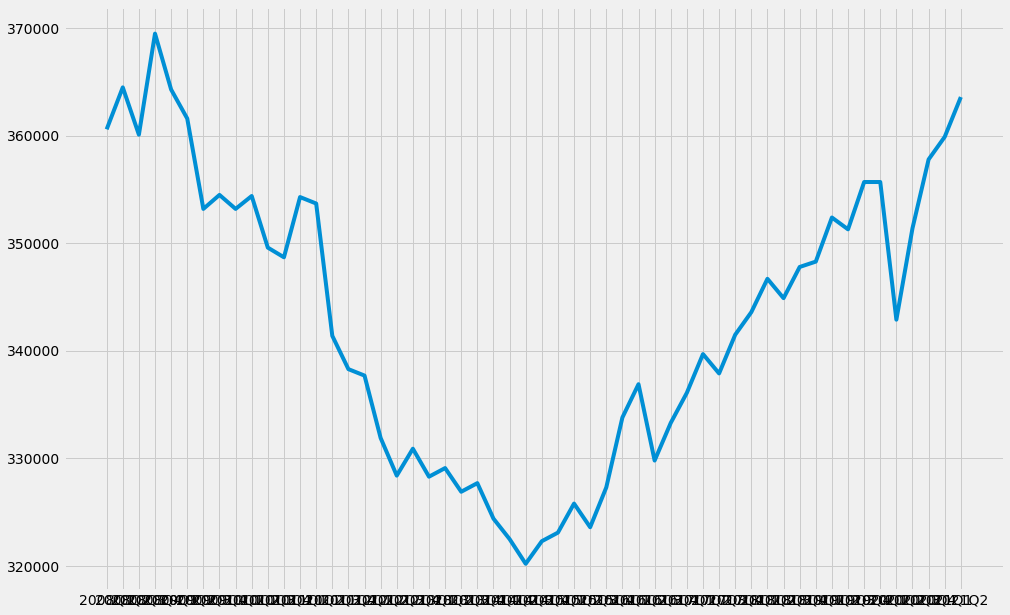

<Figure size 432x288 with 0 Axes>

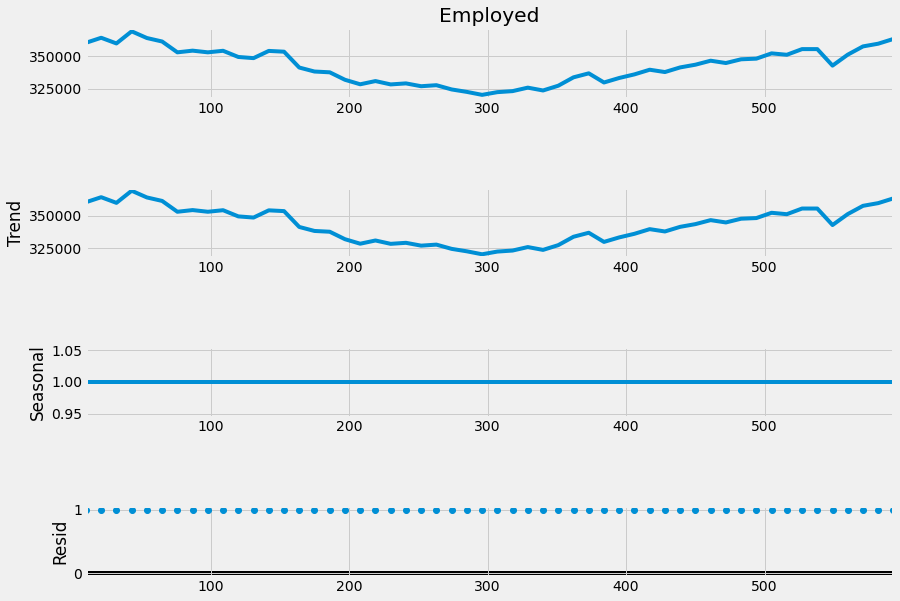

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\

                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -530.266
Date:                Sun, 06 Aug 2023   AIC                           1074.533
Time:                        22:44:51   BIC                           1088.456
Sample:                             0   HQIC                          1079.902
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.43e+05   1.33e+04     25.830      0.000    3.17e+05    3.69e+05
ar.L1          0.9402      0.091     10.358      0.000       0.762       1.118
ar.L2         -0.9560      0.124     -7.685      0.0

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


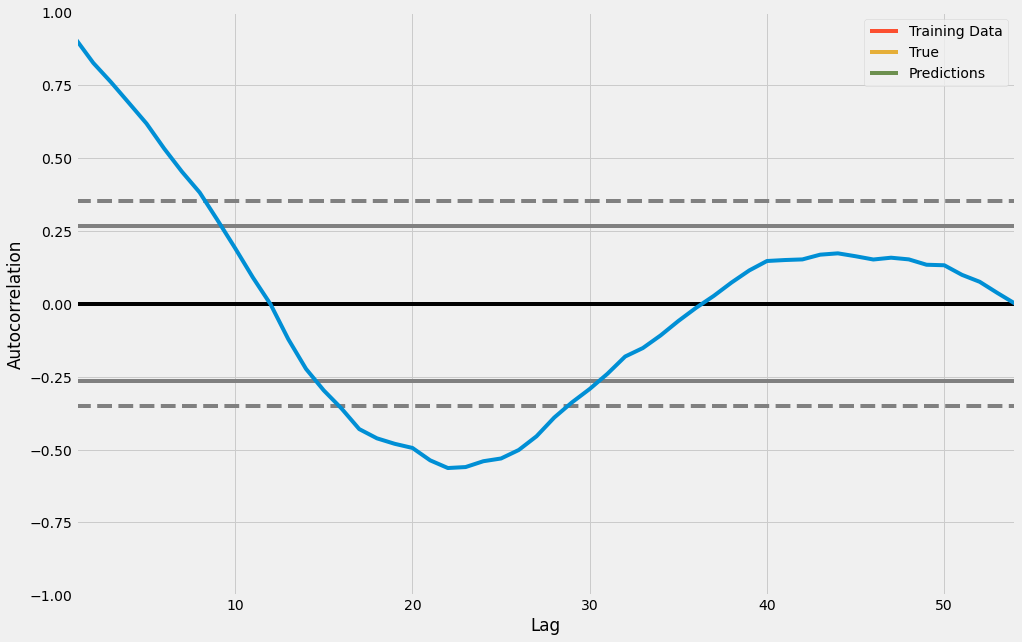

In [38]:
# ARIMA model
## ARIMA is an appropriate choice for time series forecasting, especially when the data exhibits a clear trend and seasonality, which are often present in economic and employment-related data.
sectors = employment['sector'].unique()
for i in range(len(sectors)):
    print("Details are showing for", sectors[i])
    employment_industry = employment.loc[employment['sector'] == sectors[i]]
    display(employment_industry.head())
    data, test = train_test_split(employment_industry, test_size=0.1, shuffle=False)
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(15, 10))
    plt.plot(data["Quarter"], data["Employed"])
    plt.show()
    result = seasonal_decompose(data["Employed"], 
                            model='multiplicative', extrapolate_trend = "freq",
                               period = 1)
    fig = plt.figure()  
    fig = result.plot()  
    fig.set_size_inches(15, 10)
    plt.show()
    
    pd.plotting.autocorrelation_plot(data["Employed"])
    
    plot_pacf(data["Employed"], lags = 20)


In [50]:
p_list = [3,4,3,6,5,4,3,7,5,3,6]
d_list = [0,0,0,0,0,0,0,0,0,0,0]
q_list = [6,7,6,5,8,6,7,5,8,3,4]

Details are showing for Civil service


,Quarter,sector,Employed
0,2008Q1,Civil service,41700.0
11,2008Q2,Civil service,42700.0
22,2008Q3,Civil service,43000.0
33,2008Q4,Civil service,42700.0
44,2009Q1,Civil service,42200.0


C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(3, 0, 6)   Log Likelihood                -458.041
Date:                Sun, 06 Aug 2023   AIC                            938.082
Time:                        22:59:07   BIC                            959.961
Sample:                             0   HQIC                           946.520
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.122e+04   2264.456     18.203      0.000    3.68e+04    4.57e+04
ar.L1          1.5347      3.662      0.419      0.675      -5.642       8.711
ar.L2         -0.1400      7.236     -0.019      0.9

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


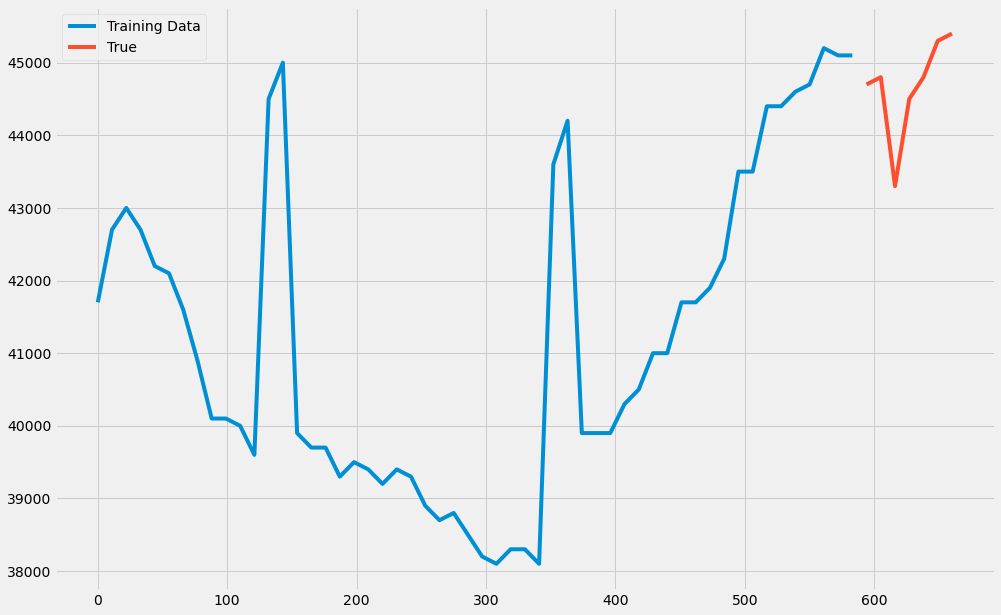

Details are showing for Defence


,Quarter,sector,Employed
1,2008Q1,Defence,11200.0
12,2008Q2,Defence,11100.0
23,2008Q3,Defence,11200.0
34,2008Q4,Defence,11200.0
45,2009Q1,Defence,11200.0


C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarn

                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(4, 0, 7)   Log Likelihood                -333.352
Date:                Sun, 06 Aug 2023   AIC                            692.704
Time:                        22:59:08   BIC                            718.561
Sample:                             0   HQIC                           702.676
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9790.7427   4.48e+04      0.219      0.827   -7.79e+04    9.75e+04
ar.L1          0.1564      0.363      0.431      0.667      -0.555       0.868
ar.L2         -0.1398      0.349     -0.401      0.6

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


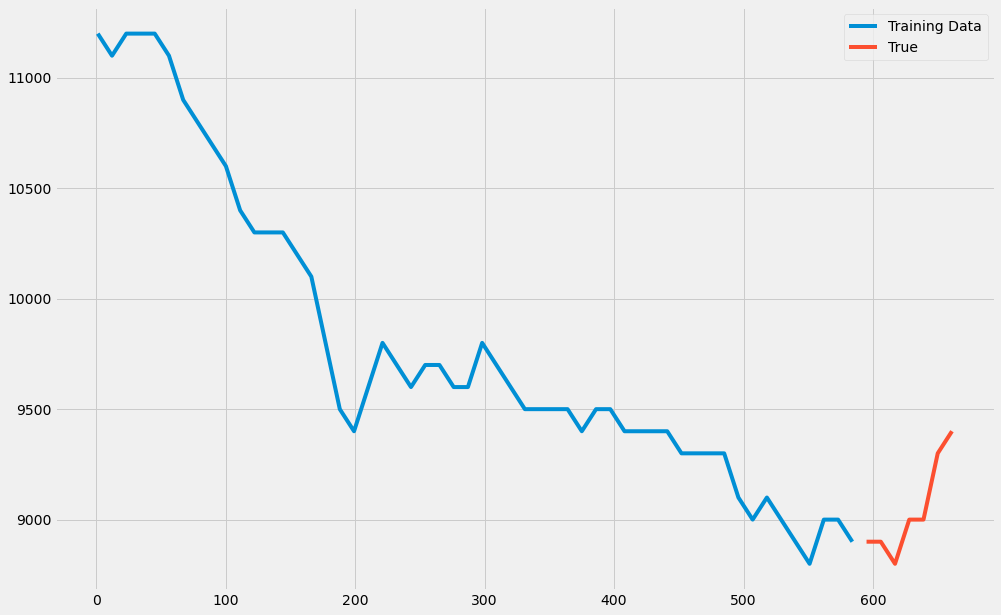

Details are showing for Garda Siochana


,Quarter,sector,Employed
2,2008Q1,Garda Siochana,14900.0
13,2008Q2,Garda Siochana,15100.0
24,2008Q3,Garda Siochana,14200.0
35,2008Q4,Garda Siochana,15300.0
46,2009Q1,Garda Siochana,14600.0


C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(3, 0, 6)   Log Likelihood                -353.650
Date:                Sun, 06 Aug 2023   AIC                            729.299
Time:                        22:59:08   BIC                            751.178
Sample:                             0   HQIC                           737.737
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.39e+04    113.381    122.636      0.000    1.37e+04    1.41e+04
ar.L1          1.5797      0.415      3.802      0.000       0.765       2.394
ar.L2         -0.1926      0.824     -0.234      0.8

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


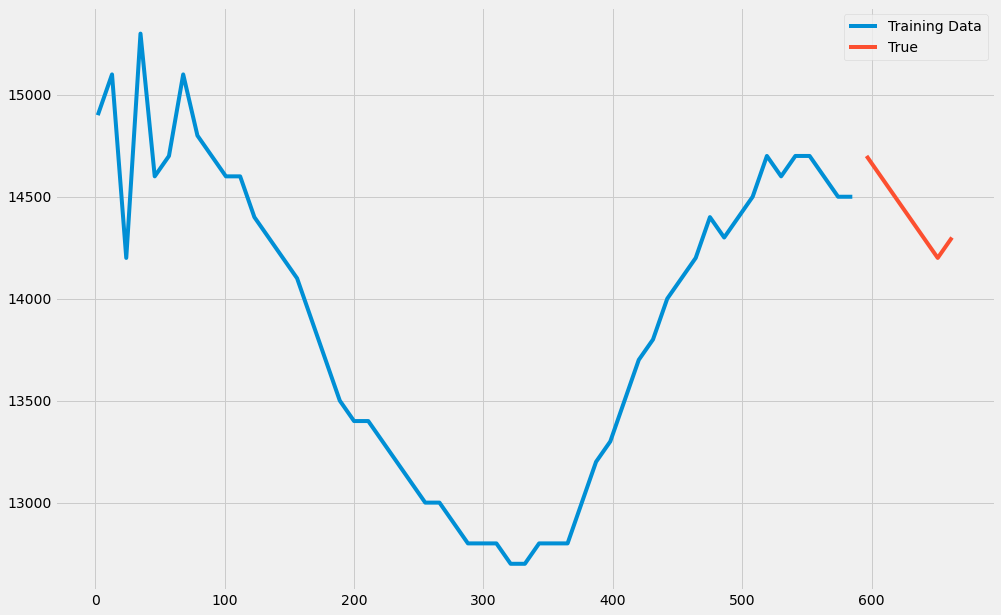

Details are showing for Education


,Quarter,sector,Employed
3,2008Q1,Education,116100.0
14,2008Q2,Education,117400.0
25,2008Q3,Education,113200.0
36,2008Q4,Education,120500.0
47,2009Q1,Education,120200.0


C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarn

                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(6, 0, 5)   Log Likelihood                -474.267
Date:                Sun, 06 Aug 2023   AIC                            974.534
Time:                        22:59:09   BIC                           1000.391
Sample:                             0   HQIC                           984.506
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.127e+05    658.658    171.103      0.000    1.11e+05    1.14e+05
ar.L1          0.9405      0.169      5.581      0.000       0.610       1.271
ar.L2         -0.6925      0.102     -6.769      0.0

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


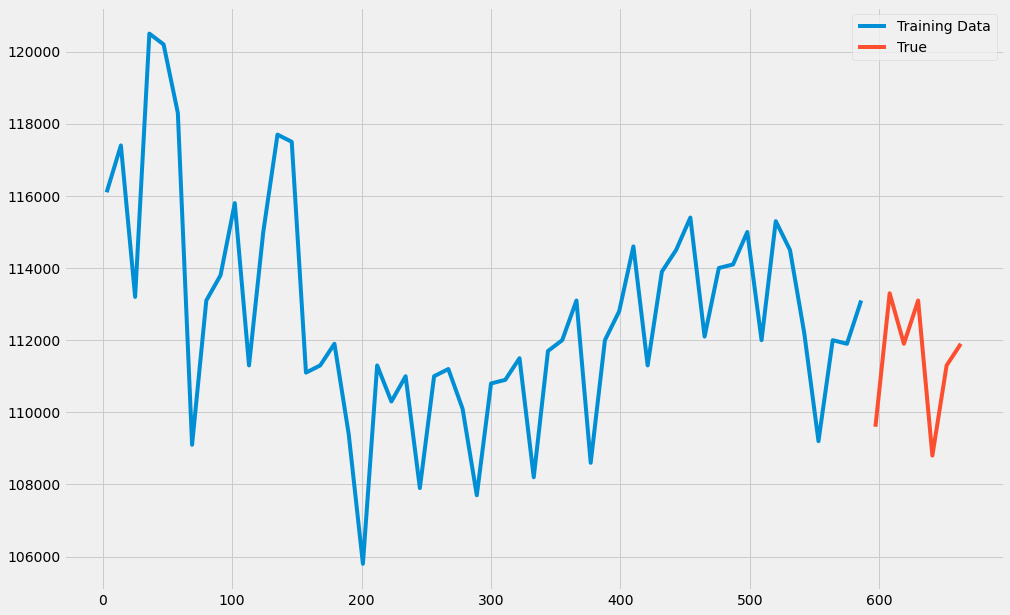

Details are showing for Regional bodies


,Quarter,sector,Employed
4,2008Q1,Regional bodies,38900.0
15,2008Q2,Regional bodies,40100.0
26,2008Q3,Regional bodies,40700.0
37,2008Q4,Regional bodies,40200.0
48,2009Q1,Regional bodies,38400.0


C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(5, 0, 8)   Log Likelihood                -479.050
Date:                Sun, 06 Aug 2023   AIC                            988.100
Time:                        22:59:10   BIC                           1017.935
Sample:                             0   HQIC                           999.606
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.475e+04    172.456    201.511      0.000    3.44e+04    3.51e+04
ar.L1          0.5560      0.055     10.148      0.000       0.449       0.663
ar.L2          0.4678      0.052      9.041      0.0

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


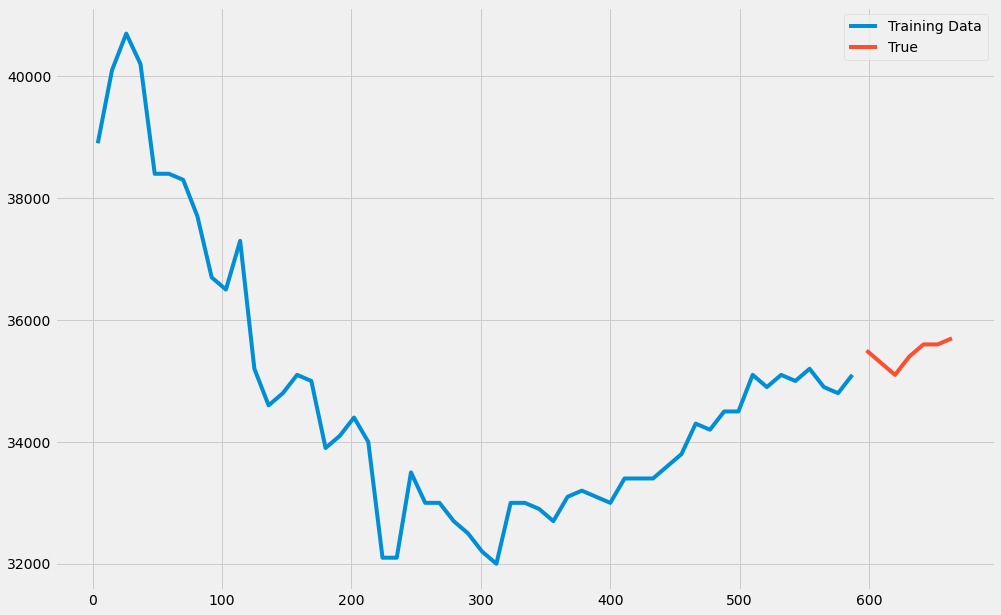

Details are showing for Health


,Quarter,sector,Employed
5,2008Q1,Health,137800.0
16,2008Q2,Health,138000.0
27,2008Q3,Health,137800.0
38,2008Q4,Health,139600.0
49,2009Q1,Health,137700.0


C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(4, 0, 6)   Log Likelihood                -496.002
Date:                Sun, 06 Aug 2023   AIC                           1016.004
Time:                        22:59:10   BIC                           1039.872
Sample:                             0   HQIC                          1025.209
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.306e+05   3318.959     39.365      0.000    1.24e+05    1.37e+05
ar.L1          0.4771      3.626      0.132      0.895      -6.630       7.584
ar.L2          1.2292      5.362      0.229      0.8

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


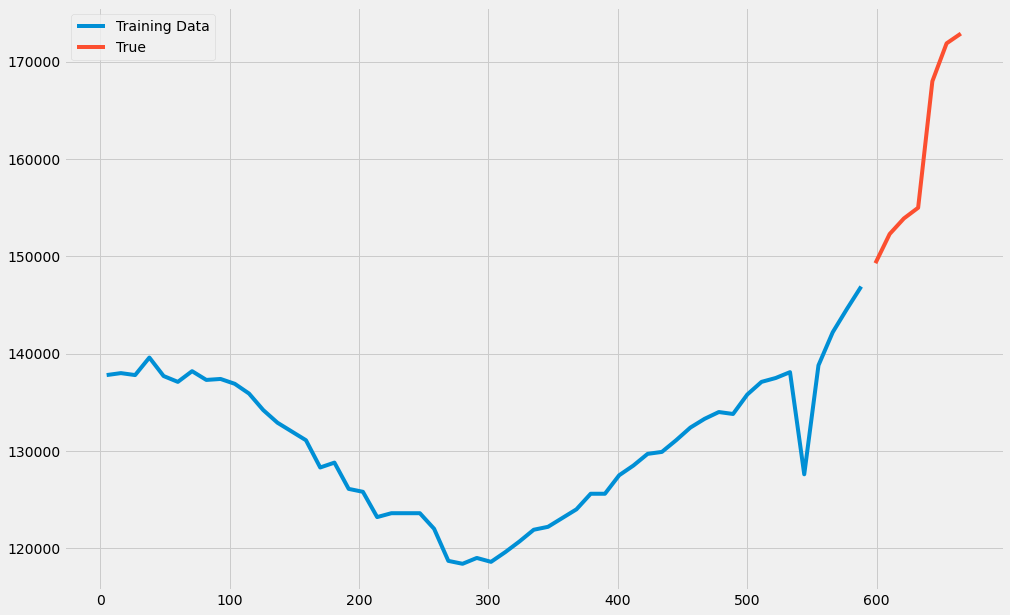

Details are showing for Semi-State companies


,Quarter,sector,Employed
6,2008Q1,Semi-State companies,56400.0
17,2008Q2,Semi-State companies,56900.0
28,2008Q3,Semi-State companies,57000.0
39,2008Q4,Semi-State companies,57800.0
50,2009Q1,Semi-State companies,56900.0


C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(3, 0, 7)   Log Likelihood                -432.968
Date:                Sun, 06 Aug 2023   AIC                            889.936
Time:                        22:59:10   BIC                            913.803
Sample:                             0   HQIC                           899.141
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.393e+04    544.780     98.990      0.000    5.29e+04     5.5e+04
ar.L1          1.4254      0.220      6.493      0.000       0.995       1.856
ar.L2         -0.1566      0.385     -0.406      0.6

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


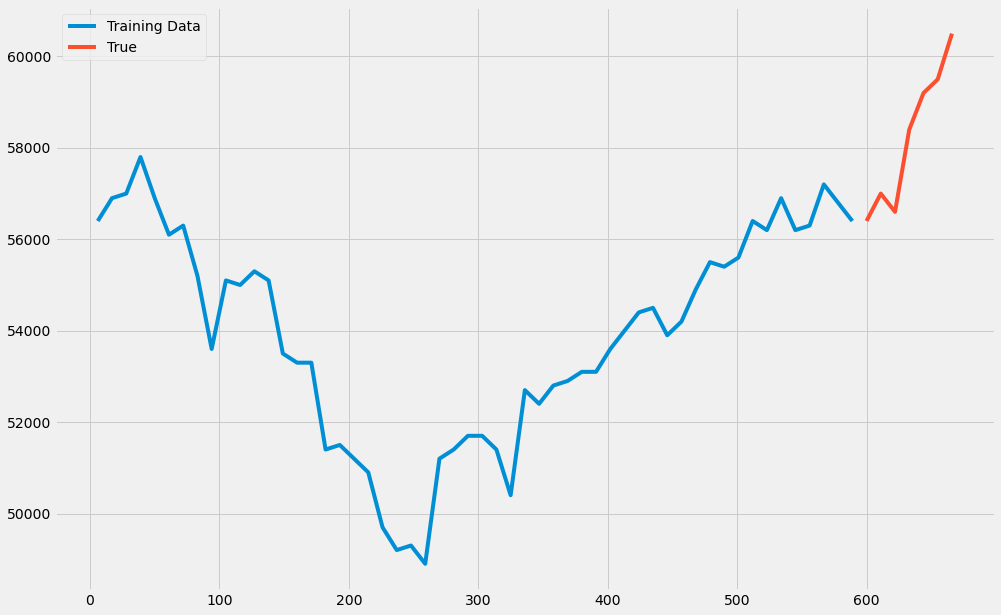

Details are showing for Commercial Semi-State companies


,Quarter,sector,Employed
7,2008Q1,Commercial Semi-State companies,44900.0
18,2008Q2,Commercial Semi-State companies,45100.0
29,2008Q3,Commercial Semi-State companies,45300.0
40,2008Q4,Commercial Semi-State companies,46000.0
51,2009Q1,Commercial Semi-State companies,45000.0


C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarn

                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(7, 0, 5)   Log Likelihood                -417.956
Date:                Sun, 06 Aug 2023   AIC                            863.913
Time:                        22:59:11   BIC                            891.759
Sample:                             0   HQIC                           874.652
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.165e+04    675.118     61.687      0.000    4.03e+04     4.3e+04
ar.L1          0.0994      0.199      0.499      0.617      -0.291       0.489
ar.L2          0.1894      0.180      1.054      0.2

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


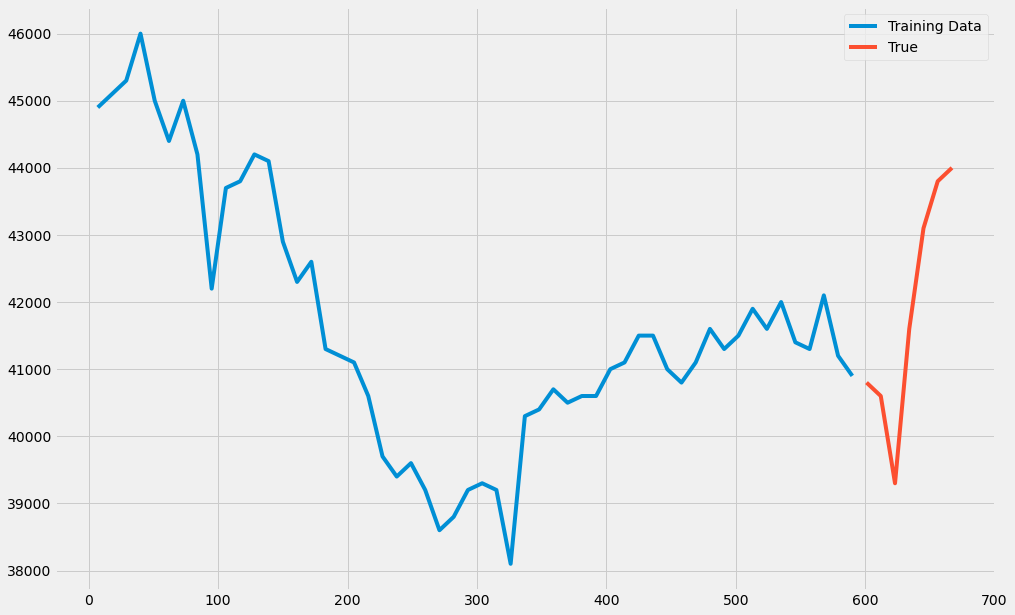

Details are showing for Non commercial Semi-State companies


,Quarter,sector,Employed
8,2008Q1,Non commercial Semi-State companies,11500.0
19,2008Q2,Non commercial Semi-State companies,11800.0
30,2008Q3,Non commercial Semi-State companies,11700.0
41,2008Q4,Non commercial Semi-State companies,11800.0
52,2009Q1,Non commercial Semi-State companies,11900.0


C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihoo

                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(5, 0, 8)   Log Likelihood                -415.044
Date:                Sun, 06 Aug 2023   AIC                            860.087
Time:                        22:59:12   BIC                            889.922
Sample:                             0   HQIC                           871.593
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.228e+04   1284.621      9.559      0.000    9761.873    1.48e+04
ar.L1          0.4761      0.142      3.346      0.001       0.197       0.755
ar.L2          0.5224      0.096      5.434      0.0

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


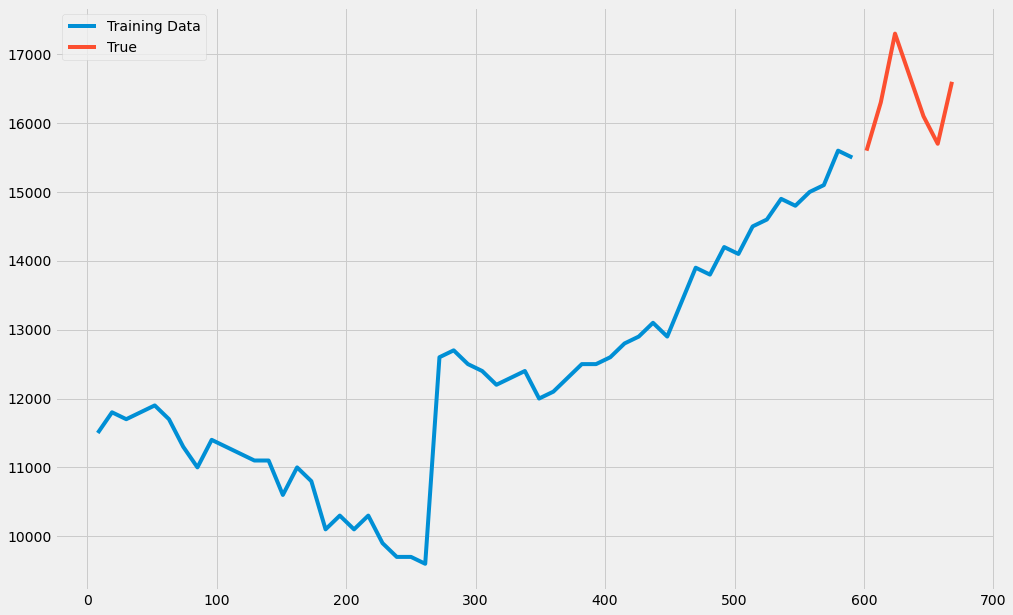

Details are showing for Total Public Sector including Semi State bodies


,Quarter,sector,Employed
9,2008Q1,Total Public Sector including Semi State bodies,417000.0
20,2008Q2,Total Public Sector including Semi State bodies,421400.0
31,2008Q3,Total Public Sector including Semi State bodies,417100.0
42,2008Q4,Total Public Sector including Semi State bodies,427300.0
53,2009Q1,Total Public Sector including Semi State bodies,421200.0


C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -528.053
Date:                Sun, 06 Aug 2023   AIC                           1072.106
Time:                        22:59:12   BIC                           1088.017
Sample:                             0   HQIC                          1078.242
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.969e+05   3118.858    127.272      0.000    3.91e+05    4.03e+05
ar.L1          0.9734      0.064     15.291      0.000       0.849       1.098
ar.L2          0.9770      0.109      8.972      0.0

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


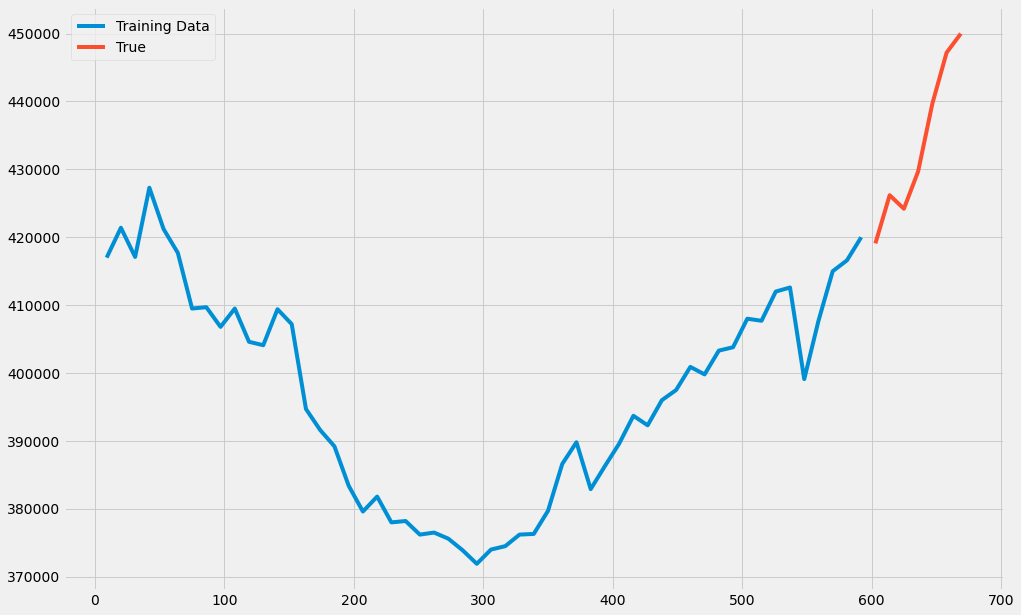

Details are showing for Total Public Sector excluding Semi State bodies


,Quarter,sector,Employed
10,2008Q1,Total Public Sector excluding Semi State bodies,360600.0
21,2008Q2,Total Public Sector excluding Semi State bodies,364500.0
32,2008Q3,Total Public Sector excluding Semi State bodies,360100.0
43,2008Q4,Total Public Sector excluding Semi State bodies,369500.0
54,2009Q1,Total Public Sector excluding Semi State bodies,364300.0


C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarn

                               SARIMAX Results                                
Dep. Variable:               Employed   No. Observations:                   54
Model:                 ARIMA(6, 0, 4)   Log Likelihood                -525.757
Date:                Sun, 06 Aug 2023   AIC                           1075.514
Time:                        22:59:13   BIC                           1099.381
Sample:                             0   HQIC                          1084.719
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.43e+05   1.24e+04     27.733      0.000    3.19e+05    3.67e+05
ar.L1          0.0651      0.186      0.350      0.726      -0.299       0.429
ar.L2          0.5518      0.195      2.832      0.0

C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mustafa.barak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


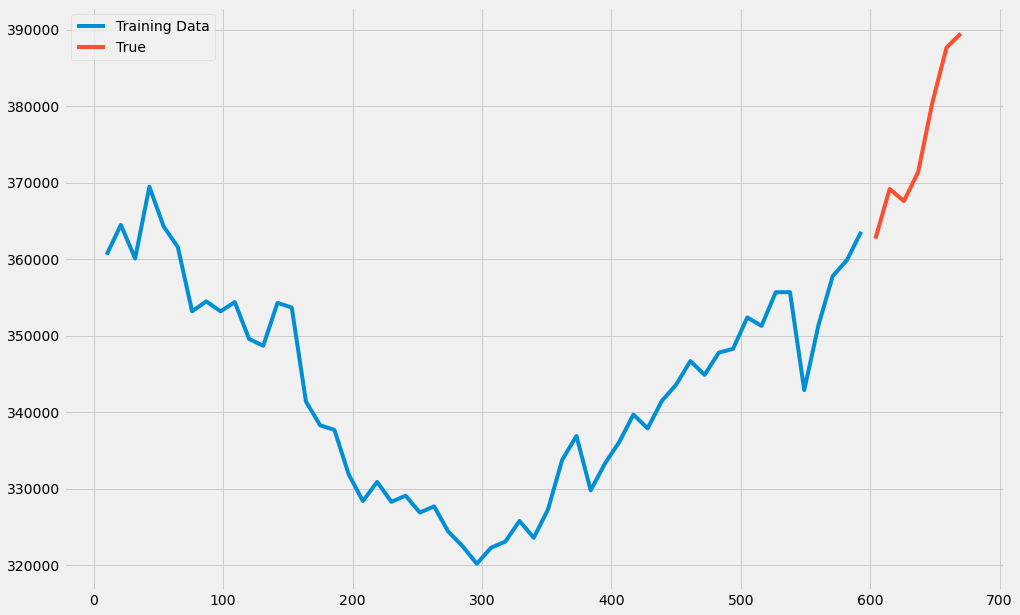

In [53]:
for i in range(len(sectors)):
    print("Details are showing for", sectors[i])
    employment_industry = employment.loc[employment['sector'] == sectors[i]]
    display(employment_industry.head())
    data, test = train_test_split(employment_industry, test_size=0.1, shuffle=False)

    p, d, q = p_list[i], d_list[i], q_list[i]
    model = sm.tsa.arima.ARIMA(data["Employed"], order=(p,d,q))
    fitted = model.fit()  
    print(fitted.summary())
    
    predictions = fitted.predict(len(data), len(data)+5)

    data["Employed"].plot(legend=True, label="Training Data", figsize=(15, 10))
    test["Employed"].plot(legend=True,label="True")
    #predictions.plot(legend=True, label="Predictions")
    plt.show()

In [54]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [80]:
employ_public.head()

,Country,Indicator,Year,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Value
0,Austria,Employment in general government as a percenta...,2007,9015361.0,0.57%,51296.0,109.0,82409.0,65000.0,1.5,43.0,57%,0.12%,16.92
1,Austria,Employment in general government as a percenta...,2008,9015361.0,0.57%,51296.0,109.0,82409.0,65000.0,1.5,43.0,57%,0.12%,16.73
2,Austria,Employment in general government as a percenta...,2009,9015361.0,0.57%,51296.0,109.0,82409.0,65000.0,1.5,43.0,57%,0.12%,17.15
3,Austria,Employment in general government as a percenta...,2010,9015361.0,0.57%,51296.0,109.0,82409.0,65000.0,1.5,43.0,57%,0.12%,17.13
4,Austria,Employment in general government as a percenta...,2011,9015361.0,0.57%,51296.0,109.0,82409.0,65000.0,1.5,43.0,57%,0.12%,16.90


In [82]:
# split data into X and y 
X = employ_public[["Year","Population (2020)","Migrants (net)"]]
Y = employ_public["Value"]

In [86]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [110]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [111]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [121]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
predictions = y_pred-90

In [122]:
# evaluate predictions
accuracy = accuracy_score(y_test.tolist(), predictions)
print("Accuracy: %.20f%%" % (accuracy * 100.0))

Accuracy: 0.57142857142857139685%


When I started, I had no idea how extensive data science projects could be. Here's what I learned and did in the process:

Data Preparation: First I uploaded my dataset and performed some preprocessing steps. At this stage, I implemented important steps such as filling in missing values and coding categorical features. I split my dataset into training and test sets for model training. However, some of the errors I encountered in this process showed me how critical data preparation is.

Model Selection and Training: I decided to try different model types. I have experienced both a Random Forest and a deep learning based neural network model. However, I ran into some difficulties with both models. I saw how costly some mistakes I made especially during data preparation could cost me at this stage as well.

Model Evaluation: Finally, I tested the performance of my model. I measured how successful my model was with metrics such as MAE, MSE, and RMSE. However, I couldn't figure out exactly what these values mean. I can learn more by comparing these metrics with other models or with more experienced people.

Conclusion and Suggestions:

Data Preparation: I understand now that this is the most critical stage of the modeling process. Particular attention should be paid to steps such as filling in missing values, data transformations and cleaning.

Model Selection: I realized that I needed to be more selective about which model to use. In particular, I discovered that deep learning models work better on large datasets.

Performance Evaluation: I can find out how well my model can work in the real world by comparing the metric values I have obtained with other models or experienced people.

Optimization: I'm currently researching what I can do to further improve the performance of my model. This may include steps such as hyperparameter tuning or feature engineering.

Overall, this process has been quite instructive for me. Modeling can be a much more complex and challenging process than I expected. But now I know how I can improve the performance of my model by following the right steps and fixing any bugs I encounter. I still have a lot to learn on this journey and I am eager to learn more about it.